这个文件调查了不同normalized method下beta50_theta02 trials的TIMs和任务表现的关系

原文件名：test_normalized_beta50.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 提取数据
# MC和CQ_max数据
filename_path1 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\saved_studies\CQ_MC_Pareto_beta50_20250825_121711_pareto.csv"
# CQ_-11和任务表现数据
filename_path2 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_normalized-11_pareto.csv"
# CQ_01数据
filename_path3 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_normalized01.csv"
# CQ_without数据
filename_path4 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_without.csv"

def collect_data(filename_path):
    # 读取pareto文件
    data = pd.read_csv(filename_path)
    return data  # 需要返回数据，否则默认返回None

data1 = collect_data(filename_path1)
data2 = collect_data(filename_path2)
data3 = collect_data(filename_path3)
data4 = collect_data(filename_path4)


import ast
MC = data1["values"].apply(lambda x: ast.literal_eval(x)[1])

CQ_max = data1["values"].apply(lambda x: ast.literal_eval(x)[0])

CQ_minmax = data2["kr_threshold"]-data2['gr_threshold'] 

CQ_01 = data3["kr_threshold"]-data3['gr_threshold'] 

CQ_without = data4["kr_threshold"]-data4['gr_threshold'] 

nrmse = data2['narma10_nrmse']

error_rate = (1-np.array(data2['ti46_accuracy']))*100

# 提取出所有点的trials
trials = data2['trial_number']

print(trials)


0      33
1      34
2      60
3      65
4      71
5      74
6      75
7      78
8      87
9      90
10     93
11    105
12    106
13    119
14    120
15    127
16    139
17    144
18    157
19    168
20    174
21    176
22    202
23    204
24    211
25    247
26    250
27    252
28    267
29    291
30    294
31    295
32    310
33    311
34    317
35    320
36    329
37    336
38    337
39    341
40    351
41    352
42    364
43    367
44    376
45    382
46    393
Name: trial_number, dtype: int64


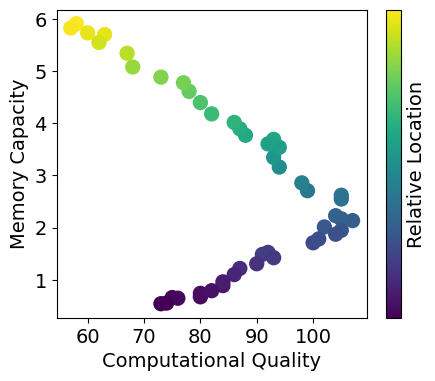

In [8]:
plt.figure(figsize=(5, 4))
plt.scatter(CQ_without, MC, c=MC, cmap='viridis', s=100)
cbar = plt.colorbar(label='Relative Location', ticks=[])
cbar.set_label('Relative Location', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

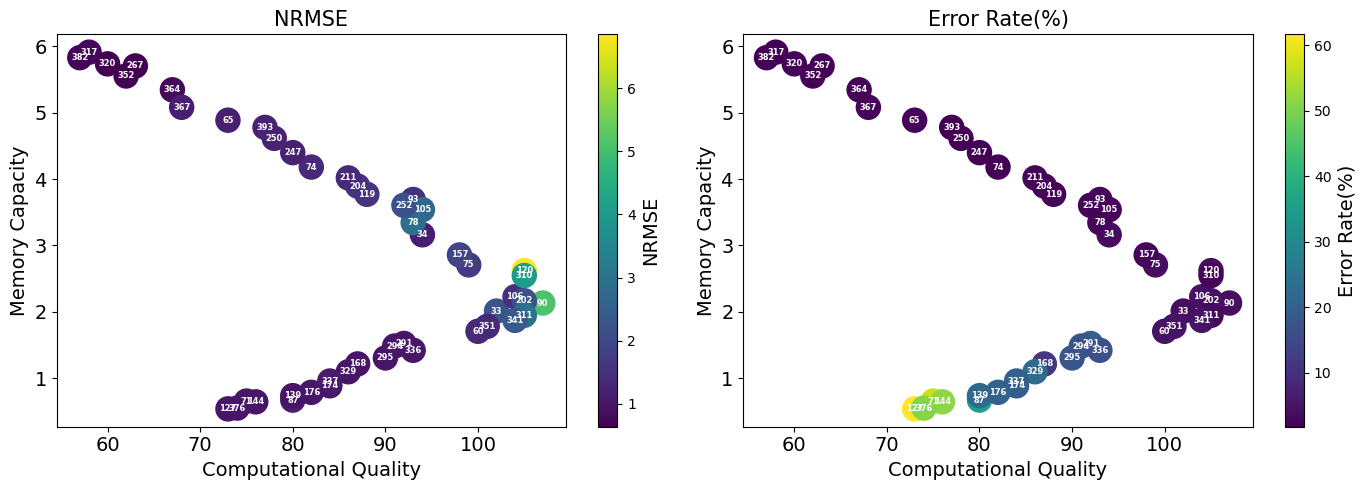

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# 子图1: NRMSE
sc1 = axs[0].scatter(CQ_without, MC, c=nrmse, cmap='viridis', s=300)
cbar1 = plt.colorbar(sc1, ax=axs[0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0].set_xlabel('Computational Quality', fontsize=14)
axs[0].set_ylabel('Memory Capacity', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
# 标注trials
for x, y, trial in zip(CQ_without, MC, trials):
    axs[0].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
axs[0].set_title('NRMSE', fontsize=15)

# 子图2: Error Rate
sc2 = axs[1].scatter(CQ_without, MC, c=error_rate, cmap='viridis', s=300)
cbar2 = plt.colorbar(sc2, ax=axs[1])
cbar2.set_label('Error Rate(%)', fontsize=14)
axs[1].set_xlabel('Computational Quality', fontsize=14)
axs[1].set_ylabel('Memory Capacity', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
# 标注trials
for x, y, trial in zip(CQ_without, MC, trials):
    axs[1].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
axs[1].set_title('Error Rate(%)', fontsize=15)

plt.tight_layout()
plt.show()

这里,使用的是标准差NRMSE,所以出现NRMSE>1的情况. 接下来尝试下minmaxNRMSE的形式

In [4]:
# 读取原始文件
df = pd.read_csv(r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\Test_Temporary\result_dict_beta50_withminmaxnrmse.csv")
# 按 head 排序后取成 numpy 数组（相当于 data2['narma10_nrmse']）
nrmse_minmax = df.sort_values("head")["nrmse_minmax"].to_numpy()

print(nrmse_minmax)

[0.40957695 0.20607553 0.23960145 0.21195767 0.17672026 0.24192386
 0.3068949  0.51399252 0.19311676 0.91119418 0.26923628 0.4915378
 0.26697366 0.28047237 1.22862982 0.17473788 0.17479173 0.17614942
 0.34478124 0.17326093 0.1792278  0.17576161 0.39141937 0.2829473
 0.24155301 0.21456852 0.22143834 0.39016649 0.11410904 0.17718619
 0.17724027 0.17762768 0.72715256 0.52875044 0.13625653 0.11585451
 0.1787885  0.18205579 0.19663906 0.42175374 0.24321696 0.11571865
 0.14396254 0.20558258 0.17528387 0.1306799  0.21951619]


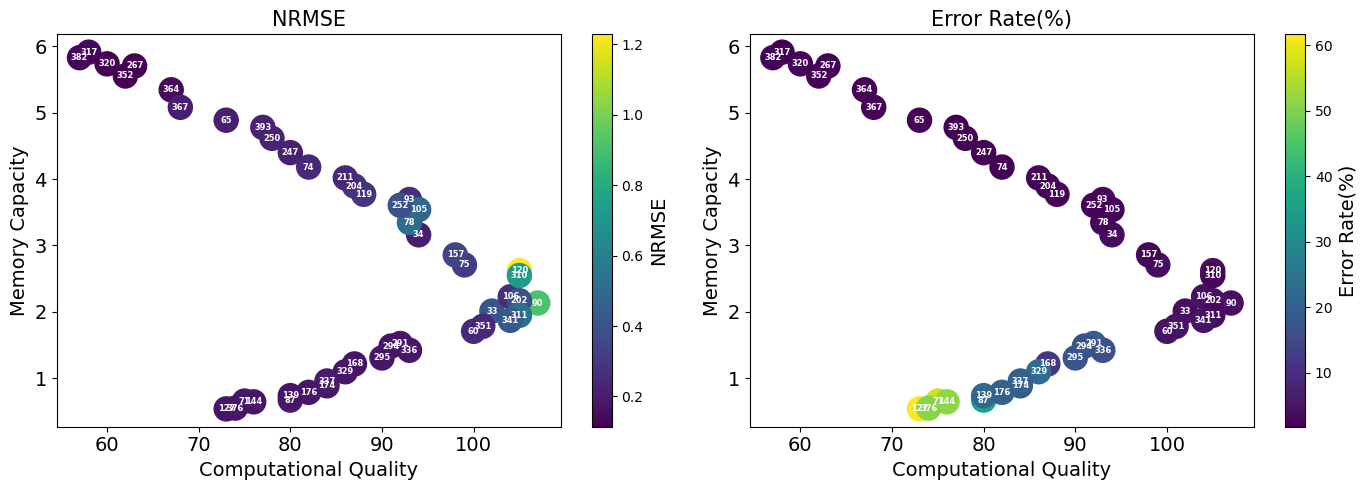

In [5]:
# 重新做图
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# 子图1: NRMSE
sc1 = axs[0].scatter(CQ_without, MC, c=nrmse_minmax, cmap='viridis', s=300)
cbar1 = plt.colorbar(sc1, ax=axs[0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0].set_xlabel('Computational Quality', fontsize=14)
axs[0].set_ylabel('Memory Capacity', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
# 标注trials
for x, y, trial in zip(CQ_without, MC, trials):
    axs[0].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
axs[0].set_title('NRMSE', fontsize=15)

# 子图2: Error Rate
sc2 = axs[1].scatter(CQ_without, MC, c=error_rate, cmap='viridis', s=300)
cbar2 = plt.colorbar(sc2, ax=axs[1])
cbar2.set_label('Error Rate(%)', fontsize=14)
axs[1].set_xlabel('Computational Quality', fontsize=14)
axs[1].set_ylabel('Memory Capacity', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
# 标注trials
for x, y, trial in zip(CQ_without, MC, trials):
    axs[1].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
axs[1].set_title('Error Rate(%)', fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\Chen\AppData\Local\Temp\ipykernel_44964\3490392596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrmse[nrmse>1]=1.1


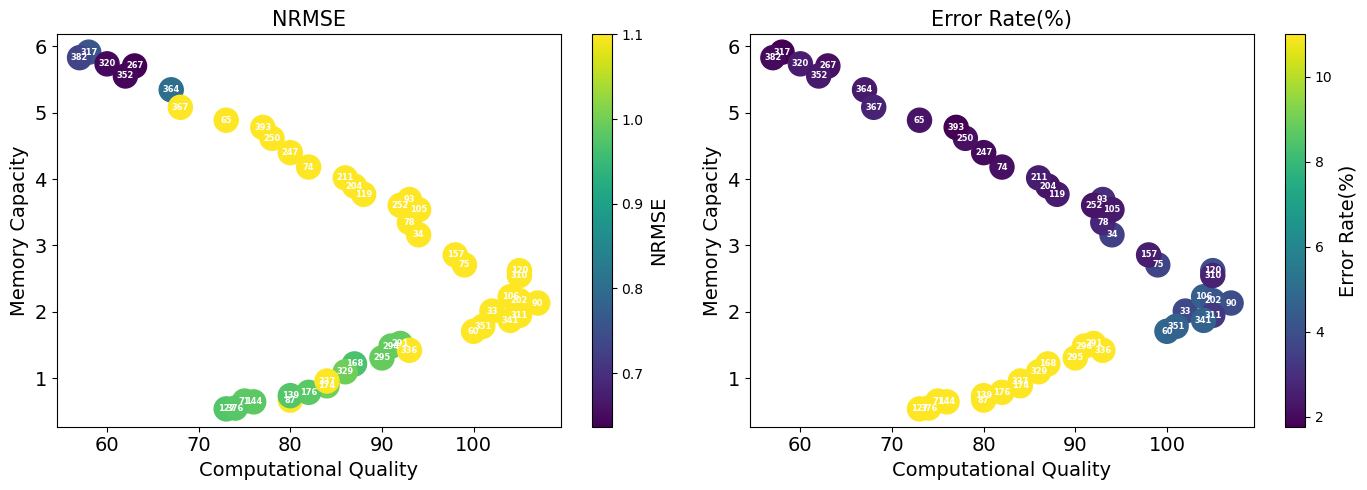

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

nrmse[nrmse>1]=1.1

error_rate[error_rate > 10] = 11

# 子图1: NRMSE
sc1 = axs[0].scatter(CQ_without, MC, c=nrmse, cmap='viridis', s=300)
cbar1 = plt.colorbar(sc1, ax=axs[0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0].set_xlabel('Computational Quality', fontsize=14)
axs[0].set_ylabel('Memory Capacity', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
# 标注trials
for x, y, trial in zip(CQ_without, MC, trials):
    axs[0].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
axs[0].set_title('NRMSE', fontsize=15)

# 子图2: Error Rate
sc2 = axs[1].scatter(CQ_without, MC, c=error_rate, cmap='viridis', s=300)
cbar2 = plt.colorbar(sc2, ax=axs[1])
cbar2.set_label('Error Rate(%)', fontsize=14)
axs[1].set_xlabel('Computational Quality', fontsize=14)
axs[1].set_ylabel('Memory Capacity', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
# 标注trials
for x, y, trial in zip(CQ_without, MC, trials):
    axs[1].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
axs[1].set_title('Error Rate(%)', fontsize=15)

plt.tight_layout()
plt.show()

验证思路: 第一步, 以No.267的任务表现作为基础.

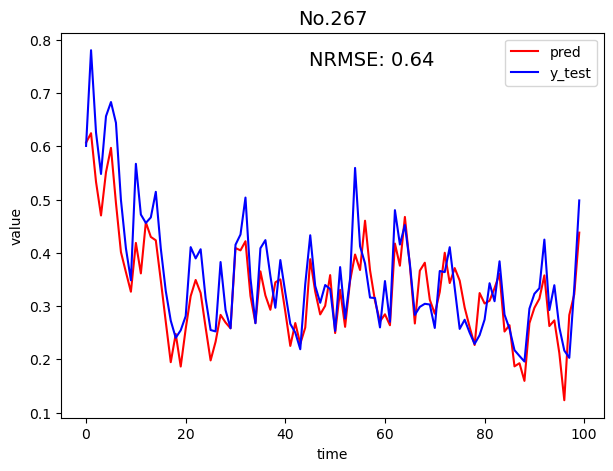

In [7]:
import pickle

with open("result_dict_beta50.pkl", "rb") as f:
    result_dict = pickle.load(f)

# 由于需要trace数据,所以只能使用result_dict.
# 在后续处理中,需要将trialnumber与result_dict中的idx对应起来.

# 提取267号的数据,其索引为28
plt.figure(figsize=(7, 5))
plt.plot(result_dict[28]['pred'][100:200],'r',label='pred')
plt.plot(result_dict[28]['y_test'][100:200],'b',label='y_test')
# 在图上打印出NRMSE
# 通过坐标控制文本位置，例如放在右上角
plt.text(70, max(result_dict[28]['y_test'][100:200]), 
         f'NRMSE: {result_dict[28]["NRMSE"]:.2f}', 
         fontsize=14, ha='right', va='top', color='black')
plt.xlabel('time')
plt.ylabel('value')
plt.title(f'No.267',fontsize=14)
plt.legend()
plt.show()





创建No.267的储层来进行随机输入测试

In [20]:
# import necessary libraries
import os
import torch 
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import pickle
from pathlib import Path


CANDIDATES = [
    
    Path(r"C:\Users\tom\Desktop\Repository"),
    Path(r"C:\Users\Chen\Desktop\Repository"),
    Path(r"/Users/vvvp./Desktop"),
]
searchpaths = [p for p in CANDIDATES if p.exists()]

#tuple of repos
repos = ('machine_learning_library',)





import sys
import os
# In Jupyter notebooks, __file__ is not defined. Use the current working directory instead.
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import repo_tools
repo_tools.repos_path_finder(searchpaths, repos)
from spnc import spnc_anisotropy
import spnc_ml as ml
from deterministic_mask import fixed_seed_mask, max_sequences_mask

from single_node_res import single_node_reservoir
import ridge_regression as RR
from linear_layer import *
from mask import binary_mask
from utility import *
from NARMA10 import NARMA10
from datasets.load_TI46_digits import *
import datasets.load_TI46 as TI46
from sklearn.metrics import classification_report
from formal_Parameter_Dynamics_Preformance import *

In [21]:
# 构建储层对象
class ReservoirParams:
    def __init__(self, **kwargs):
            # Reservoir parameters 
            self.h = 0.4
            self.theta_H = 90
            self.k_s_0 = 0
            self.phi = 45
            self.beta_prime = 35.13826524755751

            # Network parameters 
            self.Nvirt = 50
            self.m0 = 0.005288612874870094
            self.bias = True
            self.Nwarmup = 0
            self.verbose_repr = False

            self.params = {
                'theta': 0.34142235979698393,
                'gamma': 0.069274461903986,
                'delay_feedback': 0,
                'Nvirt': self.Nvirt,
                'length_warmup': self.Nwarmup,
                'warmup_sample': self.Nwarmup * self.Nvirt,
                'voltage_noise': False,
                'seed_voltage_noise': 1234,
                'delta_V': 0.1,
                'johnson_noise': False,
                'seed_johnson_noise': 1234,
                'mean_johnson_noise': 0.0000,
                'std_johnson_noise': 0.00001,
                'thermal_noise': False,
                'seed_thermal_noise': 1234,
                'lambda_ou': 1.0,
                'sigma_ou': 0.1
        }

            for key in ['h', 'theta_H', 'k_s_0', 'phi', 'beta_prime', 'Nvirt', 'm0', 'bias', 'Nwarmup']:
                if key in kwargs:
                    setattr(self, key, kwargs[key])

            
            if 'params' in kwargs and isinstance(kwargs['params'], dict):
                self.params.update(kwargs['params'])

    
    def update_params(self, **kwargs):
        for key, value in kwargs.items():
            if hasattr(self, key):
                setattr(self, key, value)
            if key in self.params:
                self.params[key] = value
            if not hasattr(self, key) and key not in self.params:
                raise AttributeError(f"ReservoirParams has no attribute or param key '{key}'")
            
    def print_params(self, verbose=False):
        if not verbose:
            print(f"ReservoirParams(h={self.h}, beta_prime={self.beta_prime}, Nvirt={self.Nvirt})")
        else:
            print(f"ReservoirParams detailed info:")
            print(f"  h = {self.h}")
            print(f"  theta_H = {self.theta_H}")
            print(f"  k_s_0 = {self.k_s_0}")
            print(f"  phi = {self.phi}")
            print(f"  beta_prime = {self.beta_prime}")
            print(f"  Nvirt = {self.Nvirt}")
            print(f"  m0 = {self.m0}")
            print(f"  bias = {self.bias}")
            print("  params dictionary:")
            for k, v in self.params.items():
                print(f"    {k}: {v}")

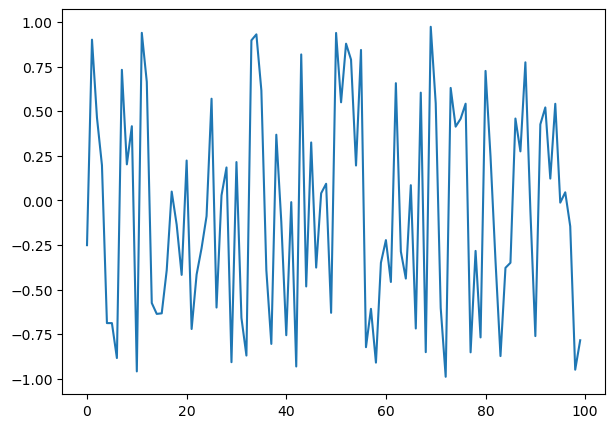

In [22]:
# 创建噪音输入
np.random.seed(42)  # 固定随机种子
noise_input = np.random.uniform(-1, 1, 500)

plt.figure(figsize=(7, 5))
plt.plot(noise_input[0:100])
plt.show()

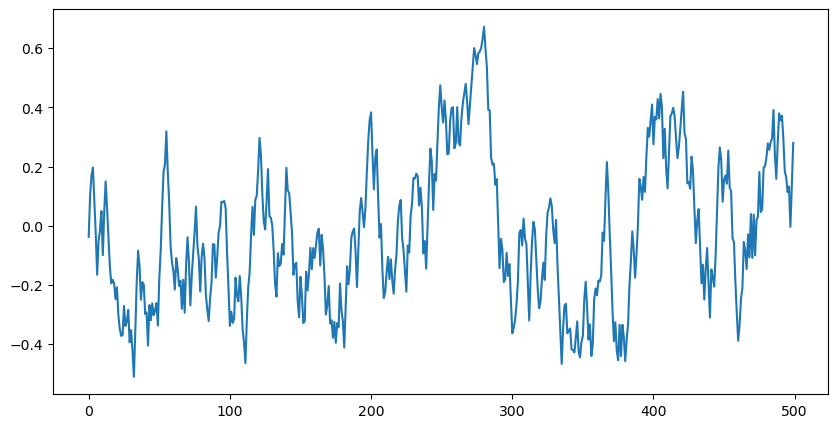

In [23]:
# set Reservoirs and RunSpncs
spn_267 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_267 = ReservoirParams(
            h=0.4, m0=0.0516554082018051, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0480297911638143, 'Nvirt': 1}
        )
transform_267 =  spn_267.gen_signal_slow_delayed_feedback

S_267 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_267.Nvirt, params_267.m0, transform_267, params_267.params, fixed_mask=True, seed_mask=1234)

plt.figure(figsize=(10, 5))
plt.plot(S_267)
plt.show()

验证: 第二步,看看第二区域的储层们随着CQ和MC变化后,trace是如何变化的

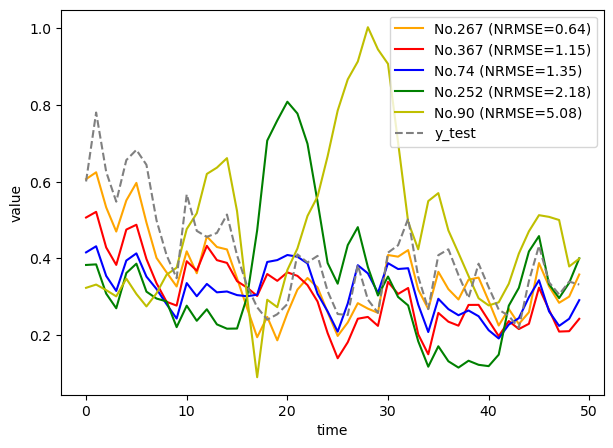

In [40]:
# 选择四个位于第二区域的储层作为测试对象,分别是No.367(43),No.74(5),No.252(27),No.90(9)
plt.figure(figsize=(7, 5))
plt.plot(result_dict[28]['pred'][100:150],'orange',label=f'No.267 (NRMSE={result_dict[28]["NRMSE"]:.2f})')
plt.plot(result_dict[43]['pred'][100:150], 'r', label=f"No.367 (NRMSE={result_dict[43]['NRMSE']:.2f})")
plt.plot(result_dict[5]['pred'][100:150],'b',label=f'No.74 (NRMSE={result_dict[5]["NRMSE"]:.2f})')
plt.plot(result_dict[27]['pred'][100:150],'g',label=f'No.252 (NRMSE={result_dict[27]["NRMSE"]:.2f})')
plt.plot(result_dict[9]['pred'][100:150],'y',label=f'No.90 (NRMSE={result_dict[9]["NRMSE"]:.2f})')


plt.plot(result_dict[43]['y_test'][100:150], color='gray', linestyle='--', label='y_test')

plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

In [87]:
def NRMSE_maxmin(pred, desired):
    rmse = np.sqrt(np.mean(np.square(np.subtract(pred, desired))))
    return rmse / (np.max(desired) - np.min(desired))

nrmse_maxmin = NRMSE_maxmin(result_dict[9]['pred'], result_dict[9]['y_test'])

nrmse_maxmin_267 = NRMSE_maxmin(result_dict[28]['pred'], result_dict[28]['y_test'])

print(nrmse_maxmin_267)

0.11410904225873264


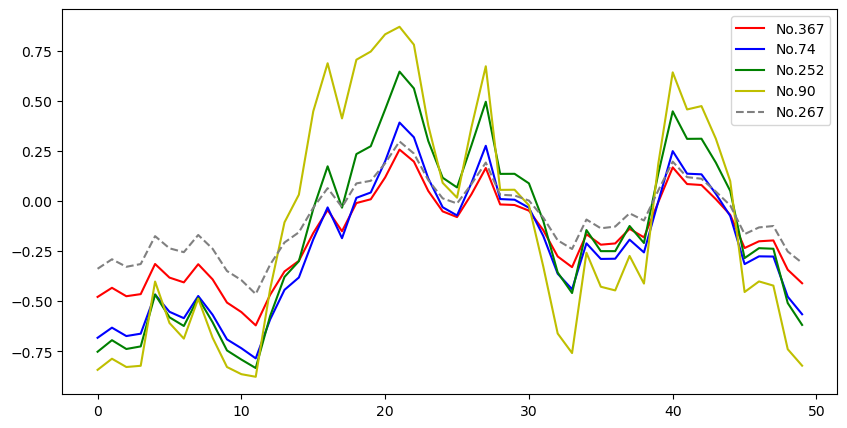

In [36]:
# set Reservoirs and RunSpncs
spn_367 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_367 = ReservoirParams(
            h=0.4, m0=0.060112674154498, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0578430239725703, 'Nvirt': 1}
        )
transform_367 =  spn_367.gen_signal_slow_delayed_feedback

S_367 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_367.Nvirt, params_367.m0, transform_367, params_367.params, fixed_mask=True, seed_mask=1234)

spn_74 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_74 = ReservoirParams(
            h=0.4, m0=0.0848363752017415, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0674087689787963, 'Nvirt': 1}
        )
transform_74 =  spn_74.gen_signal_slow_delayed_feedback

S_74 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_74.Nvirt, params_74.m0, transform_74, params_74.params, fixed_mask=True, seed_mask=1234)

spn_252 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_252 = ReservoirParams(
            h=0.4, m0=0.110137348900895, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0719404679432657, 'Nvirt': 1}
        )
transform_252 =  spn_252.gen_signal_slow_delayed_feedback

S_252 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_252.Nvirt, params_252.m0, transform_252, params_252.params, fixed_mask=True, seed_mask=1234)


spn_90 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_90 = ReservoirParams(
            h=0.4, m0=0.172921647212051, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0911277470879576, 'Nvirt': 1}
        )
transform_90 =  spn_90.gen_signal_slow_delayed_feedback

S_90 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_90.Nvirt, params_90.m0, transform_90, params_90.params, fixed_mask=True, seed_mask=1234)

plt.figure(figsize=(10, 5))
plt.plot(S_367[100:150],'r',label='No.367')
plt.plot(S_74[100:150],'b',label='No.74')
plt.plot(S_252[100:150],'g',label='No.252')
plt.plot(S_90[100:150],'y',label='No.90')

plt.plot(S_267[100:150],color='gray', linestyle='--',label='No.267')
plt.legend()
plt.show()  



从当前的结论而言,在第二部分储层中,随着CQ的增加和MC的降低.储层的非线性能力逐步增强(对应的记忆能力也应当逐渐减弱).

让我们看一下第一部分和第二部分的交接处,No.367和364的差别

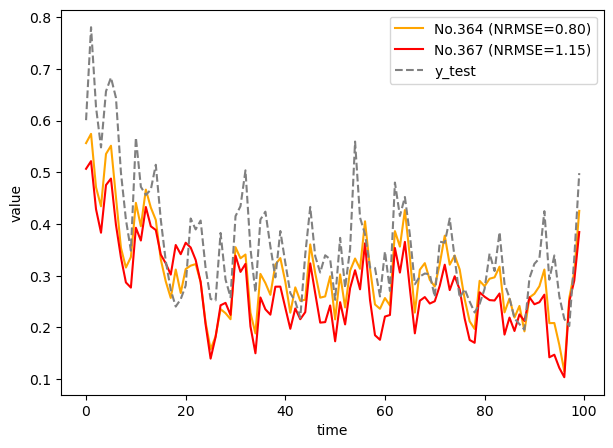

In [9]:
# 对比No.364(42),第一部分和No.367(43),第二部分的储层作为测试对象
plt.figure(figsize=(7, 5))
plt.plot(result_dict[42]['pred'][100:200],'orange',label=f'No.364 (NRMSE={result_dict[42]["NRMSE"]:.2f})')
plt.plot(result_dict[43]['pred'][100:200], 'r', label=f"No.367 (NRMSE={result_dict[43]['NRMSE']:.2f})")
plt.plot(result_dict[43]['y_test'][100:200], color='gray', linestyle='--', label='y_test')

plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

结论:确实两者的trace之间有差距,差距是由于超参数的变化而导致的.

接下来,让我们总体来看下在第二部分的储层中,他们的CQ和MC与NRMSE和error_rate之间的相关性如何

pearson相关系数为: -0.57
spearman相关系数为: -0.68
pearson相关系数为: 0.81
spearman相关系数为: 0.83
pearson相关系数为: 0.64
spearman相关系数为: 0.67
pearson相关系数为: -0.79
spearman相关系数为: -0.84


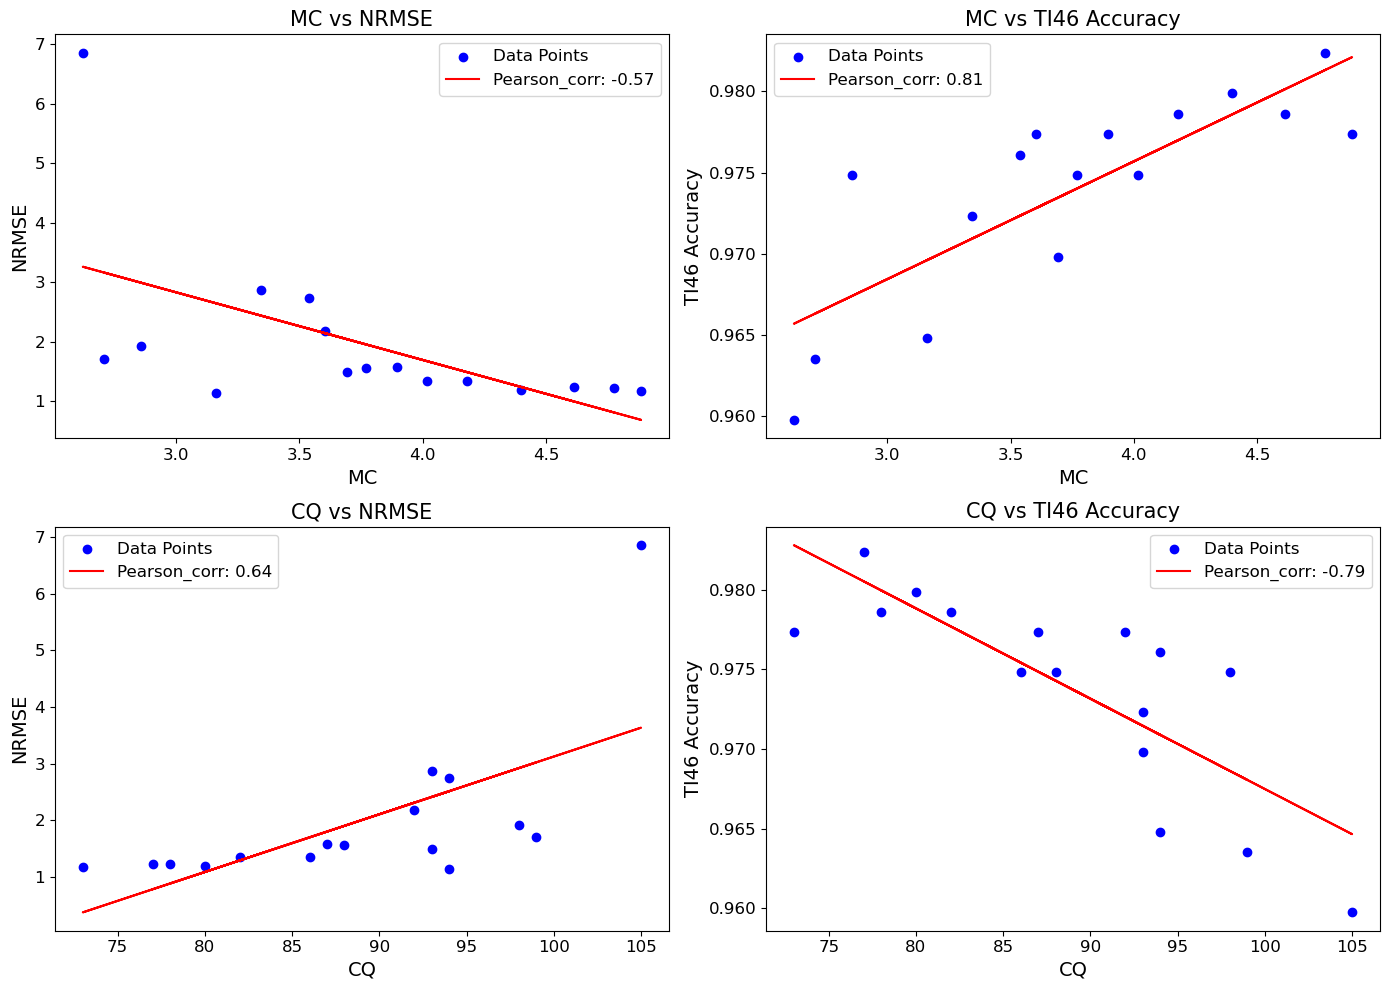

In [38]:
# 首先,我需要评估相关性的代码. 
# 假设参数之间的相关性都是线性的,所以在这里使用pearson相关系数来评估.

import pandas as pd
import seaborn as sns

# 其次,我需要选择第二部分的所有储层的数据
# 筛选标准是MC在(2.1,5)范围内的储层

filename_path5 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_without_addedMCnrmseacc.csv"
data5 = collect_data(filename_path5)
secondpart = data5[(data5['MC']>2.6) & (data5['MC']<5)]

# 计算pearson相关系数
corr_MCnrmse = secondpart['nrmse'].corr(secondpart['MC'], method='pearson')
print(f"pearson相关系数为: {corr_MCnrmse:.2f}")

# 计算spearman相关系数
corr_MCnrmse_spearman = secondpart['nrmse'].corr(secondpart['MC'], method='spearman')
print(f"spearman相关系数为: {corr_MCnrmse_spearman:.2f}")

corr_MCacc = secondpart['acc'].corr(secondpart['MC'], method='pearson')
print(f"pearson相关系数为: {corr_MCacc:.2f}")

# 计算spearman相关系数
corr_MCacc_spearman = secondpart['acc'].corr(secondpart['MC'], method='spearman')
print(f"spearman相关系数为: {corr_MCacc_spearman:.2f}")

corr_CQnrmse = secondpart['nrmse'].corr(secondpart['CQ'], method='pearson')
print(f"pearson相关系数为: {corr_CQnrmse:.2f}")

# 计算spearman相关系数
corr_CQnrmse_spearman = secondpart['nrmse'].corr(secondpart['CQ'], method='spearman')
print(f"spearman相关系数为: {corr_CQnrmse_spearman:.2f}")

corr_CQacc = secondpart['acc'].corr(secondpart['CQ'], method='pearson')
print(f"pearson相关系数为: {corr_CQacc:.2f}")

# 计算spearman相关系数
corr_CQacc_spearman = secondpart['acc'].corr(secondpart['CQ'], method='spearman')
print(f"spearman相关系数为: {corr_CQacc_spearman:.2f}")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# MC vs nrmse
axs[0, 0].scatter(secondpart['MC'], secondpart['nrmse'], label='Data Points', color='blue')
m, b = np.polyfit(secondpart['MC'], secondpart['nrmse'], 1)
axs[0, 0].plot(secondpart['MC'], m*secondpart['MC'] + b, color='red', label=f'Pearson_corr: {corr_MCnrmse:.2f}')
axs[0, 0].set_xlabel("MC", fontsize=14)
axs[0, 0].set_ylabel("NRMSE", fontsize=14)
axs[0, 0].legend(fontsize=12)
axs[0, 0].tick_params(axis='both', labelsize=12)
axs[0, 0].set_title("MC vs NRMSE", fontsize=15)

# MC vs acc
axs[0, 1].scatter(secondpart['MC'], secondpart['acc'], label='Data Points', color='blue')
m, b = np.polyfit(secondpart['MC'], secondpart['acc'], 1)
axs[0, 1].plot(secondpart['MC'], m*secondpart['MC'] + b, color='red', label=f'Pearson_corr: {corr_MCacc:.2f}')
axs[0, 1].set_xlabel("MC", fontsize=14)
axs[0, 1].set_ylabel("TI46 Accuracy", fontsize=14)
axs[0, 1].legend(fontsize=12)
axs[0, 1].tick_params(axis='both', labelsize=12)
axs[0, 1].set_title("MC vs TI46 Accuracy", fontsize=15)

# CQ vs nrmse
axs[1, 0].scatter(secondpart['CQ'], secondpart['nrmse'], label='Data Points', color='blue')
m, b = np.polyfit(secondpart['CQ'], secondpart['nrmse'], 1)
axs[1, 0].plot(secondpart['CQ'], m*secondpart['CQ'] + b, color='red', label=f'Pearson_corr: {corr_CQnrmse:.2f}')
axs[1, 0].set_xlabel("CQ", fontsize=14)
axs[1, 0].set_ylabel("NRMSE", fontsize=14)
axs[1, 0].legend(fontsize=12)
axs[1, 0].tick_params(axis='both', labelsize=12)
axs[1, 0].set_title("CQ vs NRMSE", fontsize=15)

# CQ vs acc
axs[1, 1].scatter(secondpart['CQ'], secondpart['acc'], label='Data Points', color='blue')
m, b = np.polyfit(secondpart['CQ'], secondpart['acc'], 1)
axs[1, 1].plot(secondpart['CQ'], m*secondpart['CQ'] + b, color='red', label=f'Pearson_corr: {corr_CQacc:.2f}')
axs[1, 1].set_xlabel("CQ", fontsize=14)
axs[1, 1].set_ylabel("TI46 Accuracy", fontsize=14)
axs[1, 1].legend(fontsize=12)
axs[1, 1].tick_params(axis='both', labelsize=12)
axs[1, 1].set_title("CQ vs TI46 Accuracy", fontsize=15)

plt.tight_layout()
plt.show()






结论:从相关性上看不出有什么强相关性

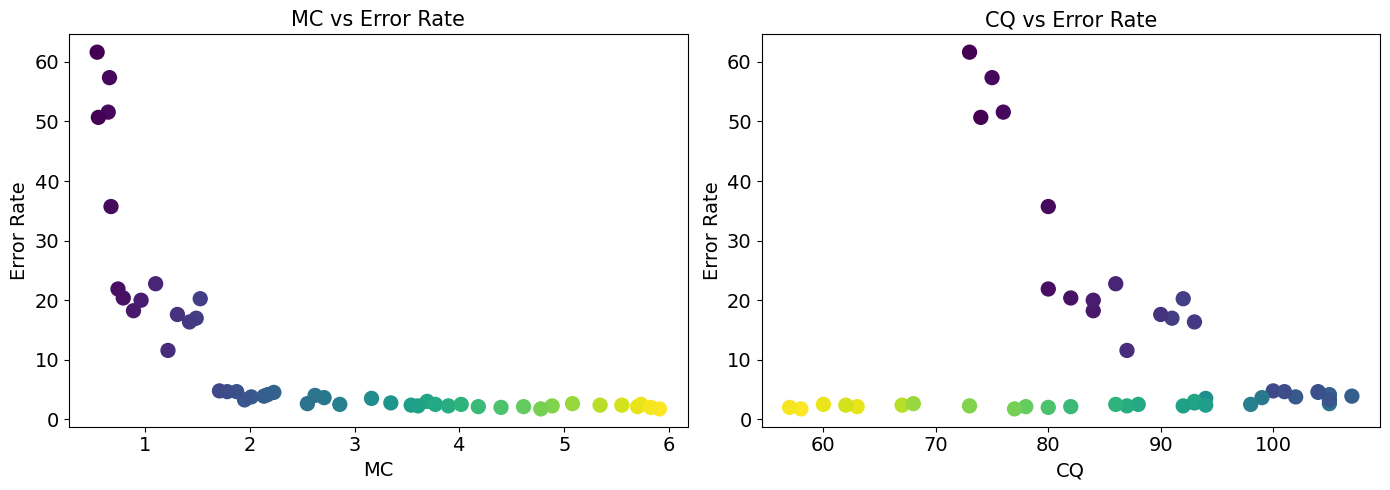

In [15]:
filename_path5 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_without_addedMCnrmseacc.csv"
data5 = collect_data(filename_path5)
data5['error_rate'] = (1 - data5['acc'])*100

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MC vs Error Rate （颜色随 MC 变化）
sc1 = axs[0].scatter(
    data5['MC'], data5['error_rate'],
    c=data5['MC'], cmap='viridis',s=100
)

axs[0].set_xlabel("MC", fontsize=14)
axs[0].set_ylabel("Error Rate", fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_title("MC vs Error Rate", fontsize=15)
# fig.colorbar(sc1, ax=axs[0], label="MC")


# CQ vs Error Rate （颜色同样按 MC 变化）
sc2 = axs[1].scatter(
    data5['CQ'], data5['error_rate'],
    c=data5['MC'], cmap='viridis',s=100
)
axs[1].set_xlabel("CQ", fontsize=14)
axs[1].set_ylabel("Error Rate", fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_title("CQ vs Error Rate", fontsize=15)
# fig.colorbar(sc2, ax=axs[1], label="MC")

plt.tight_layout()
plt.show()

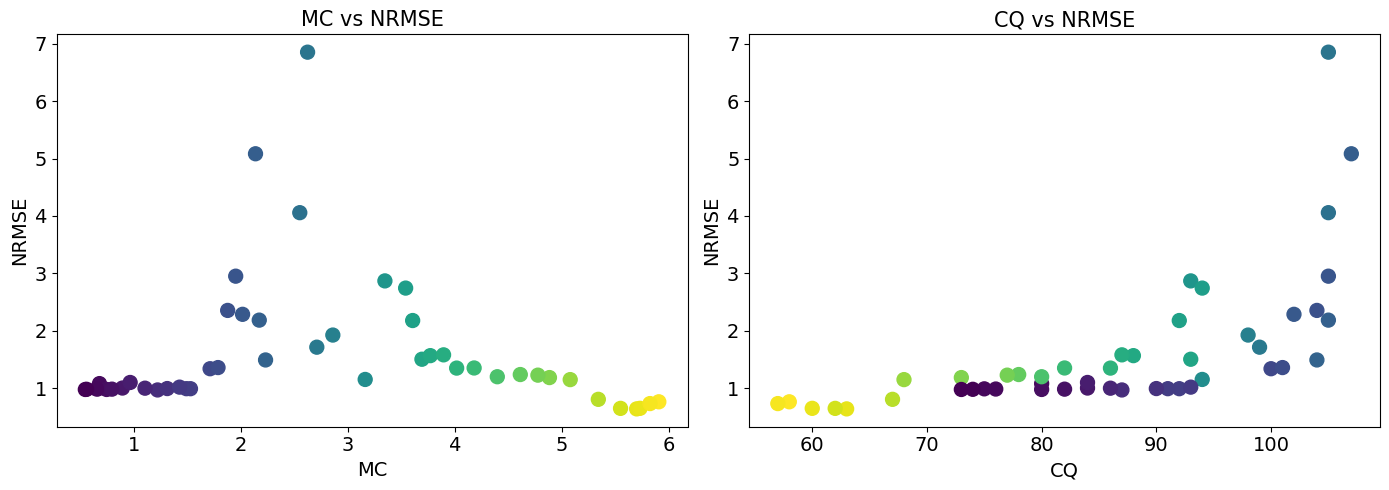

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MC vs Error Rate （颜色随 MC 变化）
sc1 = axs[0].scatter(
    data5['MC'], data5['nrmse'],
    c=data5['MC'], cmap='viridis',s=100
)

axs[0].set_xlabel("MC", fontsize=14)
axs[0].set_ylabel("NRMSE", fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_title("MC vs NRMSE", fontsize=15)
# fig.colorbar(sc1, ax=axs[0], label="MC")


# CQ vs Error Rate （颜色同样按 MC 变化）
sc2 = axs[1].scatter(
    data5['CQ'], data5['nrmse'],
    c=data5['MC'], cmap='viridis',s=100
)
axs[1].set_xlabel("CQ", fontsize=14)
axs[1].set_ylabel("NRMSE", fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_title("CQ vs NRMSE", fontsize=15)
# fig.colorbar(sc2, ax=axs[1], label="MC")

plt.tight_layout()
plt.show()

结论:以上的数据可以看出第二部分的储层在TI46任务上保持了很高的水平.

接下来,让我们看看第三部分的储层.

假设:它们具有不错的CQ,但是它们的MC太小了,导致两个任务上都不太行.

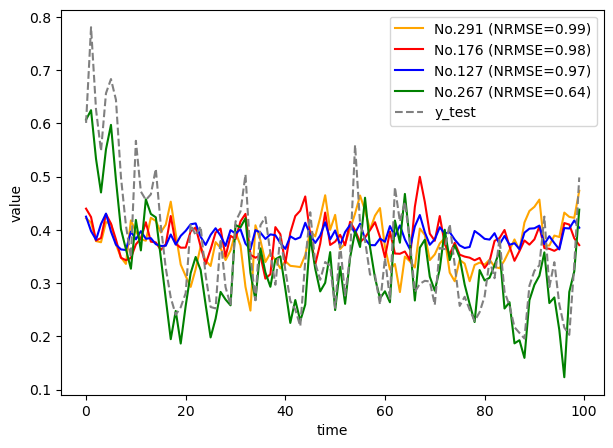

In [49]:
# 选择三个位于第三区域的储层作为测试对象,分别是No.291(29),No.176(21),No.127(15)
plt.figure(figsize=(7, 5))
plt.plot(result_dict[29]['pred'][100:200],'orange',label=f'No.291 (NRMSE={result_dict[29]["NRMSE"]:.2f})')
plt.plot(result_dict[21]['pred'][100:200], 'r', label=f"No.176 (NRMSE={result_dict[21]['NRMSE']:.2f})")
plt.plot(result_dict[15]['pred'][100:200],'b',label=f'No.127 (NRMSE={result_dict[15]["NRMSE"]:.2f})')

plt.plot(result_dict[28]['pred'][100:200], color='green', label=f'No.267 (NRMSE={result_dict[28]["NRMSE"]:.2f})')
plt.plot(result_dict[43]['y_test'][100:200], color='gray', linestyle='--', label='y_test')

plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show()

结论:第三区域的储层在NARMA10上的表现接近于freeze.有两个可能的原因:第一个记忆能力太弱,第二个在without下它们也是虚高的CQ.

先看看它们对于随机输入的反馈

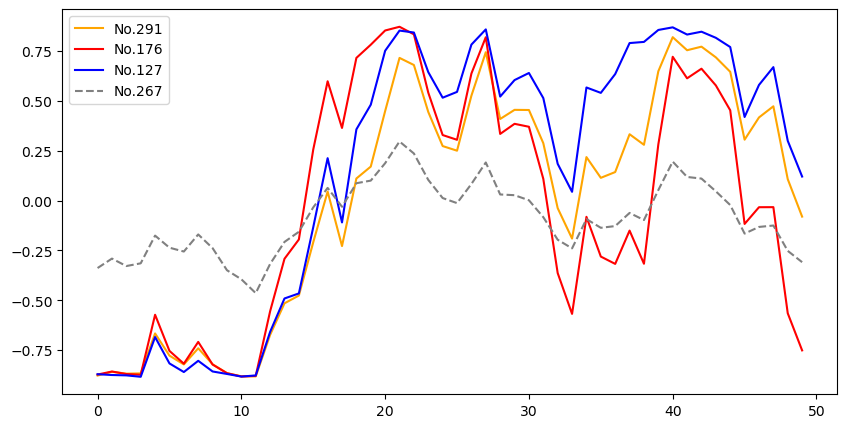

In [25]:
spn_291 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_291 = ReservoirParams(
            h=0.4, m0=0.143717896376371, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.115236493161662, 'Nvirt': 1}
        )
transform_291 =  spn_291.gen_signal_slow_delayed_feedback

S_291 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_291.Nvirt, params_291.m0, transform_291, params_291.params, fixed_mask=True, seed_mask=1234)

spn_176 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_176 = ReservoirParams(
            h=0.4, m0=0.185960205239812, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.126222632316221, 'Nvirt': 1}
        )
transform_176 =  spn_176.gen_signal_slow_delayed_feedback

S_176 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_176.Nvirt, params_176.m0, transform_176, params_176.params, fixed_mask=True, seed_mask=1234)

spn_127 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_127 = ReservoirParams(
            h=0.4, m0=0.185579609607404, Nvirt=1, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.1517379783711, 'Nvirt': 1}
        )
transform_127 =  spn_127.gen_signal_slow_delayed_feedback

S_127 = RunSpnc(noise_input.reshape(-1, 1), 1, 1, params_127.Nvirt, params_127.m0, transform_127, params_127.params, fixed_mask=True, seed_mask=1234)

plt.figure(figsize=(10, 5))
plt.plot(S_291[100:150],'orange',label='No.291')
plt.plot(S_176[100:150],'r',label='No.176')
plt.plot(S_127[100:150],'b',label='No.127')
plt.plot(S_267[100:150],'gray',linestyle='--',label='No.267')

plt.legend()
plt.show() 

结论:说明其非线性能力还挺强的,与freeze的情况不同.

看来可能的原因应该是第一种假设:记忆能力太差导致的任务表现不好.

验证:让我们使用NARMA-2任务来检测下

In [83]:
def spnc_narma2(Ntrain,Ntest,Nvirt,m0, bias,
                       transform,params,*args,**kwargs):
    """
    perform the NARMA10 task with a given resevoir

    Parameters
    ----------
    Ntrain : int
        Number of samples to train
    Ntest : int
        Number of sampels to test
    Nvirt : int
        Number of virtual nodes for the resevoir
    m0 : float
        input scaling, no scaling for value of 1
    bias : bool
        True - use bias, False - don't
    transform : function or class method
        transforms a 1D numpy array through the resevoir
    params : dict
        parameters for the resevoir
    """

    seed_NARMA = kwargs.get('seed_NARMA', None)

    def NARMA(u, N = 5, a=0.3, b=0.05, d=0.1, e=1.5, g=None):
        y = np.zeros_like(u)
        M = len(u)
        np.seterr(all = 'raise')
        for t in range(N, M):
            try:
                y[t] = y[t-1]*(a + b*np.sum(y[t-N:t])) + e*u[t-N]*u[t-1] + d
                if g is not None:
                    y[t] = g(y[t])
            except FloatingPointError:
                print(t, y[t])
                exit()

        return y

    def NARMA5(N, seed = None):

        rng = np.random.default_rng(seed)

        Nw = 1000
        u = rng.uniform(0.0, 0.5, N+Nw)
        y = NARMA(u, N=5)

        if not np.isfinite(y).all():
            u = rng.uniform(0.0, 0.2, N+Nw)
            y = NARMA(u, N=5)

        return np.expand_dims(u[Nw:], axis=1), np.expand_dims(y[Nw:], axis=1)
    # print("seed NARMA: "+str(seed_NARMA))
    u, d = NARMA5(Ntrain + Ntest,seed=seed_NARMA)

    x_train = u[:Ntrain]
    y_train = d[:Ntrain]
    x_test = u[Ntrain:]
    y_test = d[Ntrain:]
    
    # Net setup
    Nin = x_train[0].shape[-1]
    Nout = len(np.unique(y_train))

    snr = single_node_reservoir(Nin, Nout, Nvirt, m0, res = transform)
    net = linear(Nin, Nout, bias = bias)

    fixed_mask = kwargs.get('fixed_mask', True)
    if fixed_mask==True:
        # print("Deterministic mask will be used")
        seed_mask = kwargs.get('seed_mask', 1234)
        if seed_mask>=0:
            # print(seed_mask)
            snr.M = fixed_seed_mask(Nin, Nvirt, m0, seed=seed_mask)
        else:
            # print("Max_sequences mask will be used")
            snr.M = max_sequences_mask(Nin, Nvirt, m0)

    # Training
    S_train, J_train = snr.transform(x_train,params)
    np.size(S_train)
    seed_training = kwargs.get('seed_training', 1234)
    RR.Kfold_train(net,S_train,y_train,10, quiet = True, seed_training=seed_training)


    # Testing
    S_test, J_test = snr.transform(x_test,params)

    spacer = kwargs.get('spacer_NRMSE', 0) # avoid the problem of dividing by zero
    # print("Spacer NRMSE:"+str(spacer))
    pred = net.forward(S_test)
    np.size(pred)
    error = MSE(pred, y_test)
    predNRMSE = NRMSE(pred, y_test, spacer=spacer)
    print(error, predNRMSE)

    plot = kwargs.get('plot', True)
    if plot:

        plt.figure(figsize=(7,5))
        plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0), 'k--')
        plt.plot(y_test, pred, 'o')
        plt.show()

    return_outputs = kwargs.get('return_outputs', False)
    if return_outputs:
        return(y_test,pred)

    return_NRMSE = kwargs.get('return_NRMSE', False)
    if return_NRMSE:
        return(predNRMSE)


Seed Training: 1234
len(x_train): 2000
error with zero =  0.0059877981775025785
0.009176806046503139 1.0365193368426424


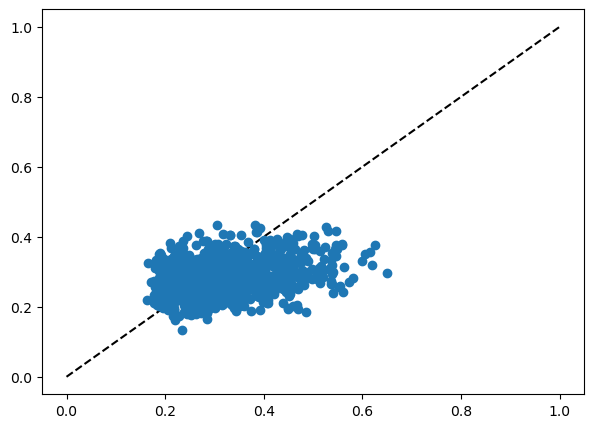

1.0497189320220848


In [84]:
spn_291 = spnc_anisotropy(0.4,90,0,45,50,restart=True)
transform_291 = spn_291.gen_signal_slow_delayed_feedback    
params_291 = ReservoirParams(
            h=0.4, m0=0.143717896376371, Nvirt=200, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.115236493161662, 'Nvirt': 200}
        )
(y_test, pred) = spnc_narma2(2000, 1000, params_291.Nvirt,
                        params_291.m0, params_291.bias,
                        transform_291, params_291.params,
                        seed_NARMA=1234, fixed_mask=True, return_outputs=True)
nrmse = NRMSE(pred[50:], y_test[50:])

print(nrmse)

In [85]:
nrmse = NRMSE(pred[50:], y_test[50:])

print(nrmse)

1.0497189320220848


从以上的结论来看,NARMA2的结果并不好.尝试再寻找一个'强非线性,不需要记忆'的基准任务

尝试下强非线性回归任务

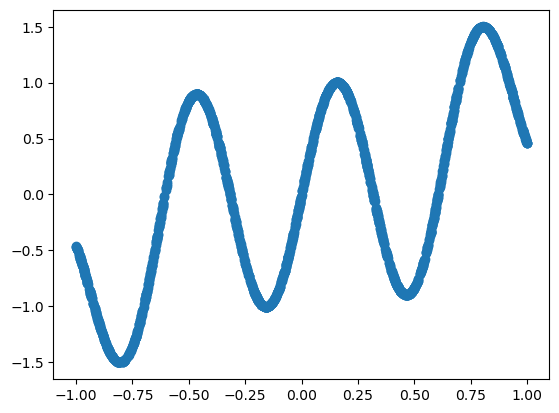

In [54]:
# 生成数据
N= 2000
u=np.random.uniform(-1,1,size = N)
y = np.sin(10*u) + u**3

# 绘制数据
plt.scatter(u,y)
#在图上标注出方程
plt.show()

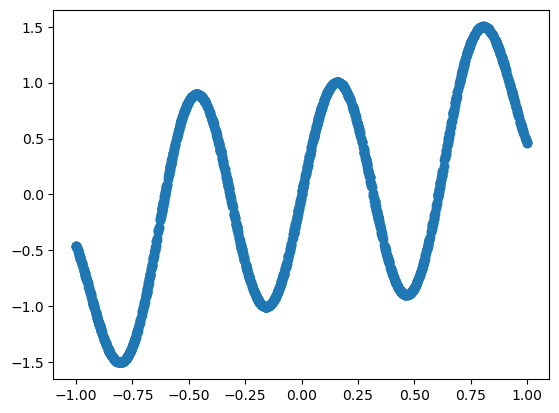

Seed Training: 1234
len(x_train): 2000
error with zero =  0.5219836306364356
0.640273279268555 0.9359568711023577


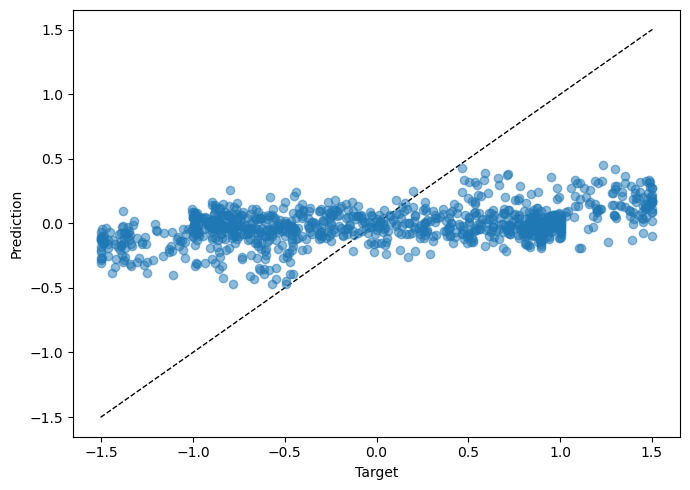

0.9359568711023577


In [92]:
# 生成数据
N= 2000
u=np.random.uniform(-1,1,size = N)
y = np.sin(10*u) + u**3

# 绘制数据
plt.scatter(u,y)
plt.show()

# 创建储层
spn_291 = spnc_anisotropy(0.4,90,0,45,50,restart=True)
transform_291 = spn_291.gen_signal_slow_delayed_feedback    
params_291 = ReservoirParams(
            h=0.4, m0=0.143717896376371, Nvirt=200, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.115236493161662, 'Nvirt': 200}
        )

def spnc_nonlinear_memless(Ntrain, Ntest, Nvirt, m0, bias, transform, params, *args, **kwargs):

    # ---------- 1) 数据生成：强非线性、无记忆 ----------
    seed_data = kwargs.get('seed_data', None)
    noise_std = kwargs.get('noise_std', 0)

    rng = np.random.default_rng(seed_data)
    T = Ntrain + Ntest
    u = rng.uniform(-1.0, 1.0, size=T + 1000)     # i.i.d., no temporal dependence
    y = np.sin(10 * u) + u**3                     # strong nonlinearity, memoryless
    if noise_std and noise_std > 0:
        y = y + rng.normal(0.0, noise_std, size=y.shape)

    # 丢弃前1000步作为“暖启动”，与原框架风格一致
    u = u[1000:]
    y = y[1000:]
    # 形状：[T, 1]
    u = np.expand_dims(u, axis=1)
    y = np.expand_dims(y, axis=1)


    # 训练/测试划分
    x_train, y_train = u[:Ntrain], y[:Ntrain]
    x_test,  y_test  = u[Ntrain:], y[Ntrain:]

    # ---------- 2) 网络与掩膜 ----------
    Nin  = x_train.shape[1]   # =1
    Nout = 1                  # 回归任务固定为1

    snr = single_node_reservoir(Nin, Nout, Nvirt, m0, res=transform)
    fixed_mask = kwargs.get('fixed_mask', True)
    if fixed_mask:
        seed_mask = kwargs.get('seed_mask', 1234)
        if seed_mask >= 0:
            snr.M = fixed_seed_mask(Nin, Nvirt, m0, seed=seed_mask)
        else:
            snr.M = max_sequences_mask(Nin, Nvirt, m0)

    # ---------- 3) 训练 ----------
    # 先通过 reservoir 得到状态，再据此设定读出层输入维度
    S_train, J_train = snr.transform(x_train, params)   # S_train: [Ntrain, D]
    D = S_train.shape[1]
    net = linear(D, Nout, bias=bias)

    seed_training = kwargs.get('seed_training', 1234)
    RR.Kfold_train(net, S_train, y_train, 10, quiet=True, seed_training=seed_training)

    # ---------- 4) 测试 ----------
    S_test, J_test = snr.transform(x_test, params)
    pred = net.forward(S_test)

    spacer = kwargs.get('spacer_NRMSE', 0.0)
    error = MSE(pred, y_test)
    predNRMSE = NRMSE(pred, y_test, spacer=spacer)
    print(error, predNRMSE)


    # ---------- 5) 可视化 ----------
    if kwargs.get('plot', True):
        plt.figure(figsize=(7,5))
        # 预测-真值散点
        plt.plot([y_test.min(), y_test.max()],
                 [y_test.min(), y_test.max()], 'k--', linewidth=1)
        plt.plot(y_test, pred, 'o', alpha=0.5)
        plt.xlabel("Target")
        plt.ylabel("Prediction")
        plt.tight_layout()
        plt.show()

    # ---------- 6) 返回选项 ----------
    if kwargs.get('return_outputs', False):
        return (y_test, pred)

    if kwargs.get('return_NRMSE', False):
        return predNRMSE

(y_test, pred) = spnc_nonlinear_memless(2000, 1000, params_291.Nvirt,
                        params_291.m0, params_291.bias,
                        transform_291, params_291.params,
                        seed_NARMA=1234, fixed_mask=True, return_outputs=True)

nrmse = NRMSE(pred, y_test)
print(nrmse)





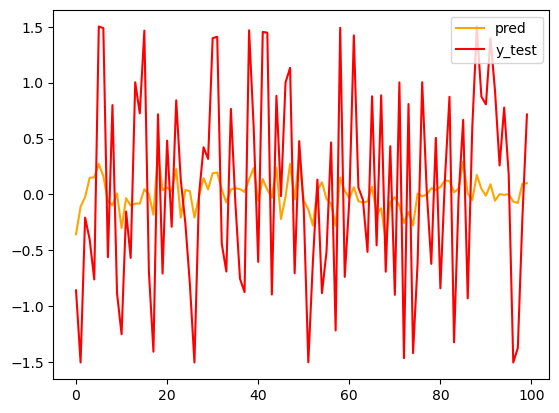

In [95]:
plt.plot(pred[0:100],'orange',label='pred')
plt.plot(y_test[0:100],'r',label='y_test')
plt.legend()
plt.show()


从结果来看,也不是很好.让我试一下No.267号

Seed Training: 1234
len(x_train): 2000
error with zero =  0.512412117931971
0.46239888920147393 0.784834756992278


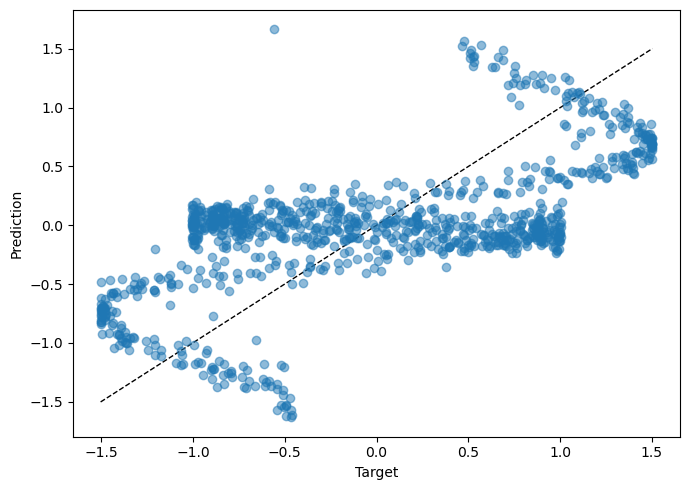

0.784834756992278


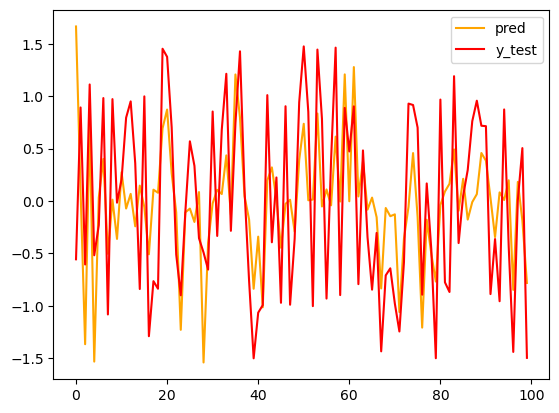

In [98]:
# set Reservoirs and RunSpncs
spn_267 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_267 = ReservoirParams(
            h=0.4, m0=0.0516554082018051, Nvirt=200, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0480297911638143, 'Nvirt': 200}
        )
transform_267 =  spn_267.gen_signal_slow_delayed_feedback

(y_test_267, pred_267) = spnc_nonlinear_memless(2000, 1000, params_267.Nvirt,
                        params_267.m0, params_267.bias,
                        transform_267, params_267.params,
                        seed_NARMA=1234, fixed_mask=True, return_outputs=True)

nrmse_267 = NRMSE(pred_267, y_test_267)
print(nrmse_267)





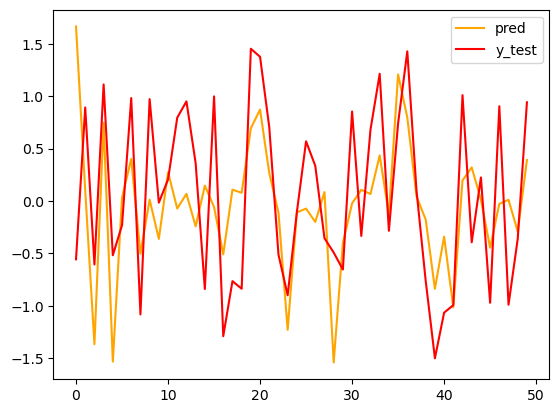

In [99]:
plt.plot(pred_267[0:50],'orange',label='pred')
plt.plot(y_test_267[0:50],'r',label='y_test')
plt.legend()
plt.show()

再试一下No.90

Seed Training: 1234
len(x_train): 2000
error with zero =  0.48156045326886565
0.44018885246575656 0.7843319855450311


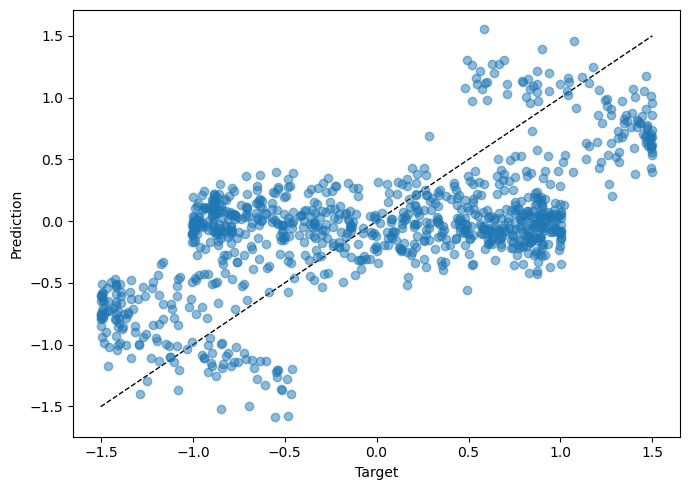

0.7843319855450311


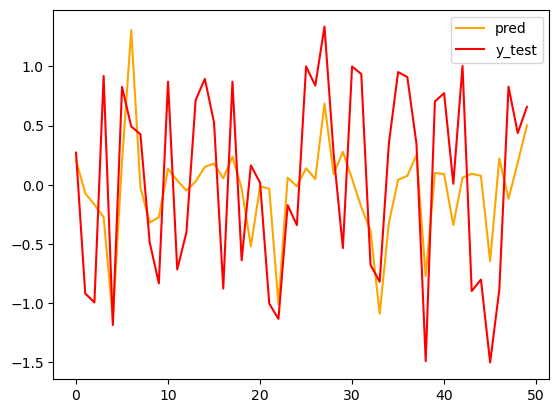

In [100]:
spn_90 = spnc_anisotropy(0.4,90,0,45,50,restart=True)
params_90 = ReservoirParams(
            h=0.4, m0=0.172921647212051, Nvirt=200, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0911277470879576, 'Nvirt': 200}
        )
transform_90 =  spn_90.gen_signal_slow_delayed_feedback
(y_test_90, pred_90) = spnc_nonlinear_memless(2000, 1000, params_90.Nvirt,
                        params_90.m0, params_90.bias,
                        transform_90, params_90.params,
                        seed_NARMA=1234, fixed_mask=True, return_outputs=True)

nrmse_90 = NRMSE(pred_90, y_test_90)
print(nrmse_90)

plt.plot(pred_90[0:50],'orange',label='pred')
plt.plot(y_test_90[0:50],'r',label='y_test')
plt.legend()
plt.show()



In [103]:
# 尝试下不同的指标
from sklearn.metrics import mean_squared_error, r2_score
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    nrmse = rmse / np.std(y_true)
    r2 = r2_score(y_true, y_pred)

    return {"MSE": mse, "RMSE": rmse, "NRMSE": nrmse, "R2": r2}

# No.291
metrics(y_test, pred)
print(f"No.291: {metrics(y_test, pred)}")
# No.267
metrics(y_test_267, pred_267)
print(f"No.267: {metrics(y_test_267, pred_267)}")
# No.90
metrics(y_test_90, pred_90)
print(f"No.90: {metrics(y_test_90, pred_90)}")

No.291: {'MSE': np.float64(0.640273279268555), 'RMSE': np.float64(0.8001707813139362), 'NRMSE': np.float64(0.9359568711023577), 'R2': 0.12398473543628452}
No.267: {'MSE': np.float64(0.46239888920147393), 'RMSE': np.float64(0.6799991832358874), 'NRMSE': np.float64(0.7848347569922781), 'R2': 0.38403440421687185}
No.90: {'MSE': np.float64(0.44018885246575656), 'RMSE': np.float64(0.6634672957017222), 'NRMSE': np.float64(0.7843319855450311), 'R2': 0.3848233364509891}


额外测试: 思考'是什么原因导致第二区域和第三区域中具有相同CQ的储层在NARMA-10任务上表现不同'时,想到会不会是正则化过程的差异.

这里,我们选择两个分别来自不同区域的储层(具有接近CQ)来详细调查他们的训练过程

In [26]:
# NARMA-10训练过程的quiet=False,我们可以打印出正则化来进行对比.
# 选择的储层分别是No.74(5)和No.176(21),他们的CQ均为82(without)

# No.74

spn_74 = spnc_anisotropy(0.4,90,0,45,50,restart=True)

params_74 = ReservoirParams(
            h=0.4, m0=0.0848363752017415, Nvirt=200, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.0674087689787963, 'Nvirt': 200}
        )
transform_74 =  spn_74.gen_signal_slow_delayed_feedback
(y_test_74,pred_74, x_train_74, y_train_74, x_test_74, y_test_74, S_train_74, S_test_74, J_train_74, J_test_74, M_74, W_74) = ml.spnc_narma10_test(2000, 1000, params_74.Nvirt,
                        params_74.m0, params_74.bias,
                        transform_74, params_74.params,
                        seed_NARMA=1234, fixed_mask=True, return_all=True)


Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  200
the mask [[ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 [-0.08483638]
 [ 0.08483638]
 [ 0.08483638]
 

In [27]:
# No.176
spn_176 = spnc_anisotropy(0.4,90,0,45,50,restart=True)
params_176 = ReservoirParams(
            h=0.4, m0=0.185960205239812, Nvirt=200, beta_prime=50,
            params={'theta': 0.2, 'gamma': 0.126222632316221, 'Nvirt': 200}
        )
transform_176 =  spn_176.gen_signal_slow_delayed_feedback

(y_test_176,pred_176, x_train_176, y_train_176, x_test_176, y_test_176, S_train_176, S_test_176, J_train_176, J_test_176, M_176, W_176) = ml.spnc_narma10_test(2000, 1000, params_176.Nvirt,
                        params_176.m0, params_176.bias,
                        transform_176, params_176.params,
                        seed_NARMA=1234, fixed_mask=True, return_all=True)

Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  200
the mask [[ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 [-0.18596021]
 [ 0.18596021]
 [ 0.18596021]
 

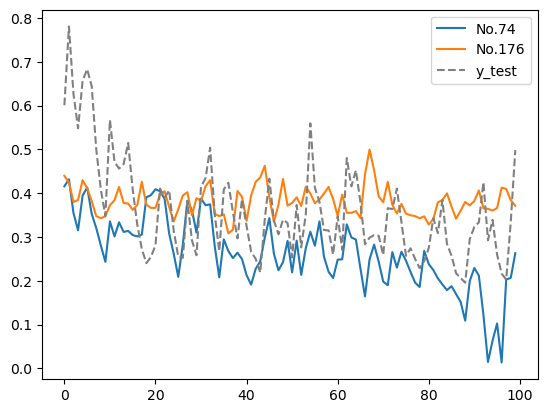

In [35]:
plt.plot(pred_74[100:200],label='No.74')
plt.plot(pred_176[100:200],label='No.176')
plt.plot(y_test_176[100:200],'grey',linestyle='--',label='y_test')
plt.legend()
plt.show()


(201, 1)
(201, 1)


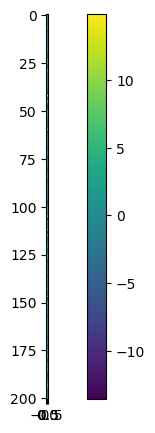

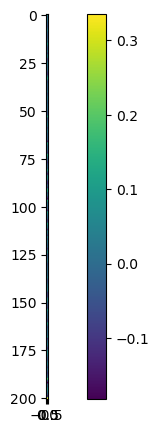

In [32]:
print(W_74.shape)
print(W_176.shape)

# 用热力图画出W_74和W_176
plt.figure(figsize=(10, 5))
plt.imshow(W_74, cmap='viridis')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(W_176, cmap='viridis')
plt.colorbar()
plt.show()




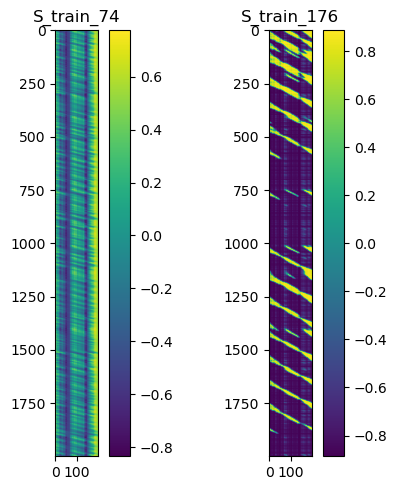

In [49]:
#可视化s_train_74和s_train_176

fig, axs = plt.subplots(1, 2, figsize=(5, 5))

im0 = axs[0].imshow(S_train_74, cmap='viridis')
axs[0].set_title("S_train_74")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(S_train_176, cmap='viridis')
axs[1].set_title("S_train_176")
fig.colorbar(im1, ax=axs[1])

plt.tight_layout()
plt.show()


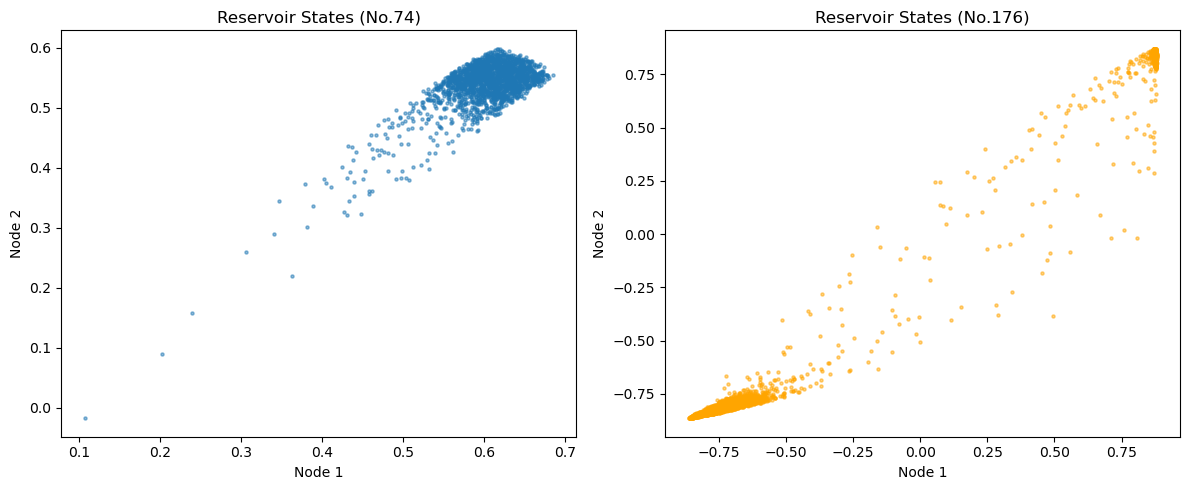

In [45]:

subset_size = 2000
S74_subset = S_train_74[:subset_size]
S176_subset = S_train_176[:subset_size]

# 画出前两个虚拟节点的状态散点对比
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(S74_subset[:,0], S74_subset[:,1], s=5, alpha=0.5)
plt.title("Reservoir States (No.74)")
plt.xlabel("Node 1")
plt.ylabel("Node 2")


plt.subplot(1,2,2)
plt.scatter(S176_subset[:,0], S176_subset[:,1], s=5, alpha=0.5, color="orange")
plt.title("Reservoir States (No.176)")
plt.xlabel("Node 1")
plt.ylabel("Node 2")

plt.tight_layout()
plt.show()

In [4]:
# 提取数据
# MC和CQ_max数据
filename_path99 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_normalized_max.csv"
#CQ_max数据
data99 = collect_data(filename_path99)



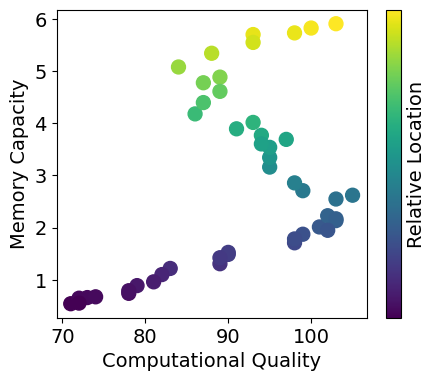

In [67]:
plt.figure(figsize=(5, 4))
plt.scatter(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], c=data99["MC"], cmap='viridis', s=100)
cbar = plt.colorbar(label='Relative Location', ticks=[])
cbar.set_label('Relative Location', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

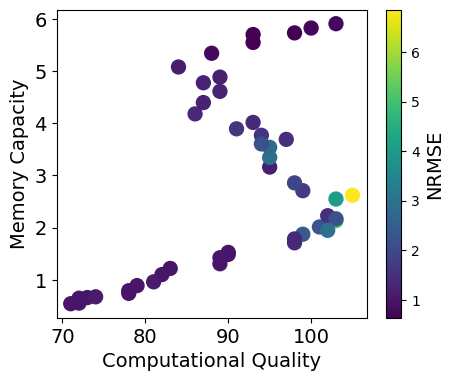

In [68]:
plt.figure(figsize=(5, 4))
plt.scatter(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], c=data99["nrmse"], cmap='viridis', s=100)
cbar = plt.colorbar(label='NRMSE')
cbar.set_label('NRMSE', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

C:\Users\Chen\AppData\Local\Temp\ipykernel_14296\3873424558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrmse[nrmse>1] = 1.1


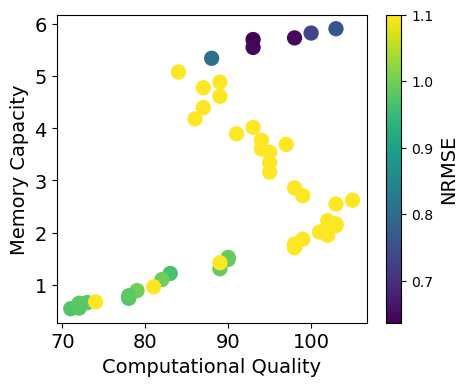

In [69]:
plt.figure(figsize=(5, 4))
nrmse = data99["nrmse"]
nrmse[nrmse>1] = 1.1
plt.scatter(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], c=nrmse, cmap='viridis', s=100)
cbar = plt.colorbar(label='NRMSE')
cbar.set_label('NRMSE', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

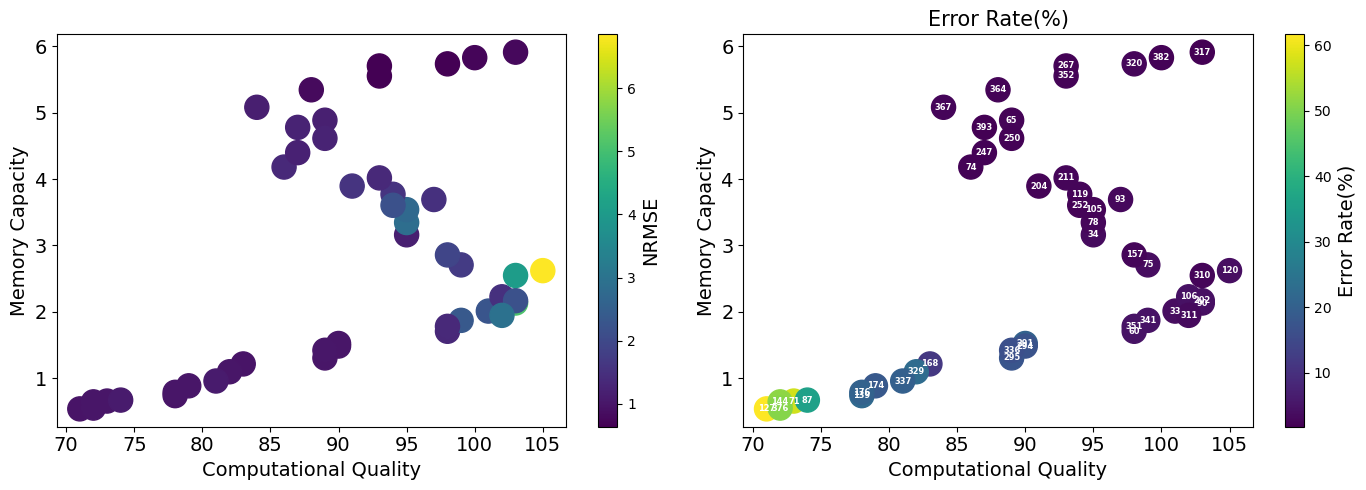

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))


# 子图1: NRMSE
sc1 = axs[0].scatter(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], c=data99["nrmse"], cmap='viridis', s=300)
cbar1 = plt.colorbar(sc1, ax=axs[0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0].set_xlabel('Computational Quality', fontsize=14)
axs[0].set_ylabel('Memory Capacity', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
# # 标注trials
# for x, y, trial in zip(CQ_without, MC, trials):
#     axs[0].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
# axs[0].set_title('NRMSE', fontsize=15)

# 子图2: Error Rate
sc2 = axs[1].scatter(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], c=(1-data99["acc"])*100, cmap='viridis', s=300)
cbar2 = plt.colorbar(sc2, ax=axs[1])
cbar2.set_label('Error Rate(%)', fontsize=14)
axs[1].set_xlabel('Computational Quality', fontsize=14)
axs[1].set_ylabel('Memory Capacity', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
# # 标注trials
for x, y, trial in zip(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], data99["trial_number"]):
    axs[1].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
axs[1].set_title('Error Rate(%)', fontsize=15)

plt.tight_layout()
plt.show()

C:\Users\Chen\AppData\Local\Temp\ipykernel_14296\3009443840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrmse[nrmse>1]=1.1


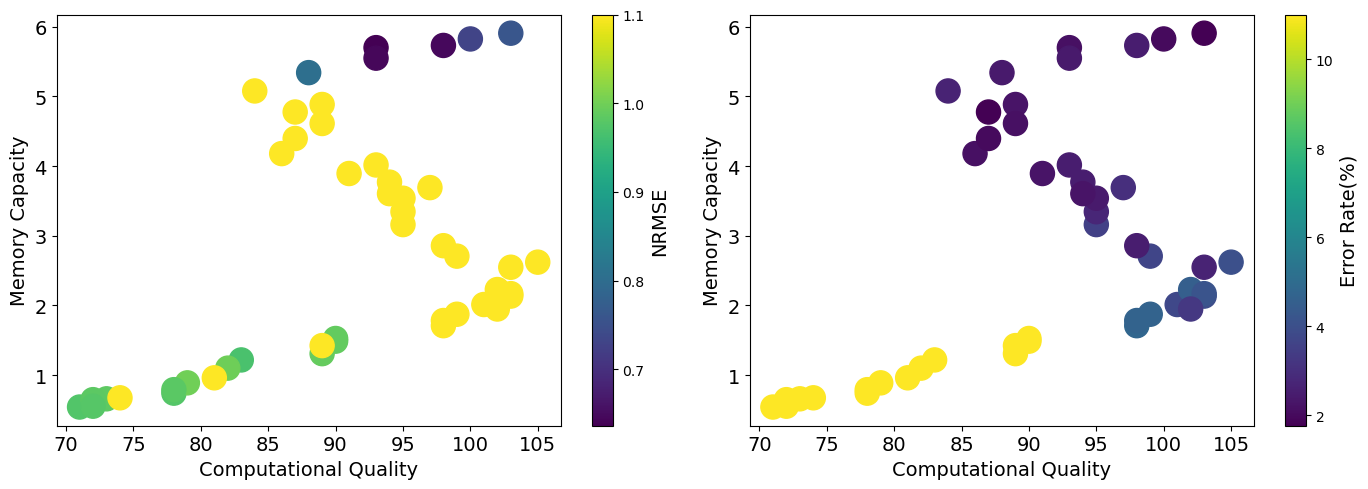

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
nrmse = data99["nrmse"]
nrmse[nrmse>1]=1.1
error_rate = (1-data99["acc"])*100
error_rate[error_rate > 10] = 11

# 子图1: NRMSE
sc1 = axs[0].scatter(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], c=nrmse, cmap='viridis', s=300)
cbar1 = plt.colorbar(sc1, ax=axs[0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0].set_xlabel('Computational Quality', fontsize=14)
axs[0].set_ylabel('Memory Capacity', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
# # 标注trials
# for x, y, trial in zip(CQ_without, MC, trials):
#     axs[0].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
# axs[0].set_title('NRMSE', fontsize=15)

# 子图2: Error Rate
sc2 = axs[1].scatter(data99["kr_threshold"]-data99["gr_threshold"], data99["MC"], c=error_rate, cmap='viridis', s=300)
cbar2 = plt.colorbar(sc2, ax=axs[1])
cbar2.set_label('Error Rate(%)', fontsize=14)
axs[1].set_xlabel('Computational Quality', fontsize=14)
axs[1].set_ylabel('Memory Capacity', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
# # 标注trials
# for x, y, trial in zip(CQ_without, MC, trials):
#     axs[1].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
# axs[1].set_title('Error Rate(%)', fontsize=15)

plt.tight_layout()
plt.show()

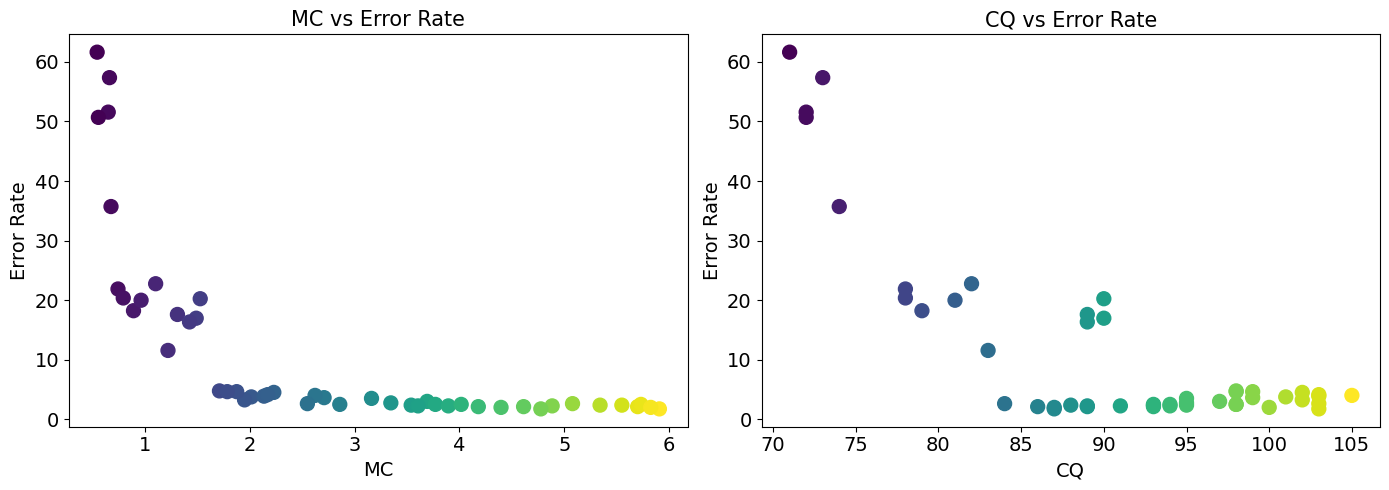

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MC vs Error Rate （颜色随 MC 变化）
sc1 = axs[0].scatter(
    data99['MC'], (1-data99["acc"])*100,
    c=data99['MC'], cmap='viridis',s=100
)

axs[0].set_xlabel("MC", fontsize=14)
axs[0].set_ylabel("Error Rate", fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_title("MC vs Error Rate", fontsize=15)
# fig.colorbar(sc1, ax=axs[0], label="MC")


# CQ vs Error Rate （颜色同样按 MC 变化）
sc2 = axs[1].scatter(
    data99['CQ'], (1-data99["acc"])*100,
    c=data99['CQ'], cmap='viridis',s=100
)
axs[1].set_xlabel("CQ", fontsize=14)
axs[1].set_ylabel("Error Rate", fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_title("CQ vs Error Rate", fontsize=15)
# fig.colorbar(sc2, ax=axs[1], label="MC")

plt.tight_layout()
plt.show()

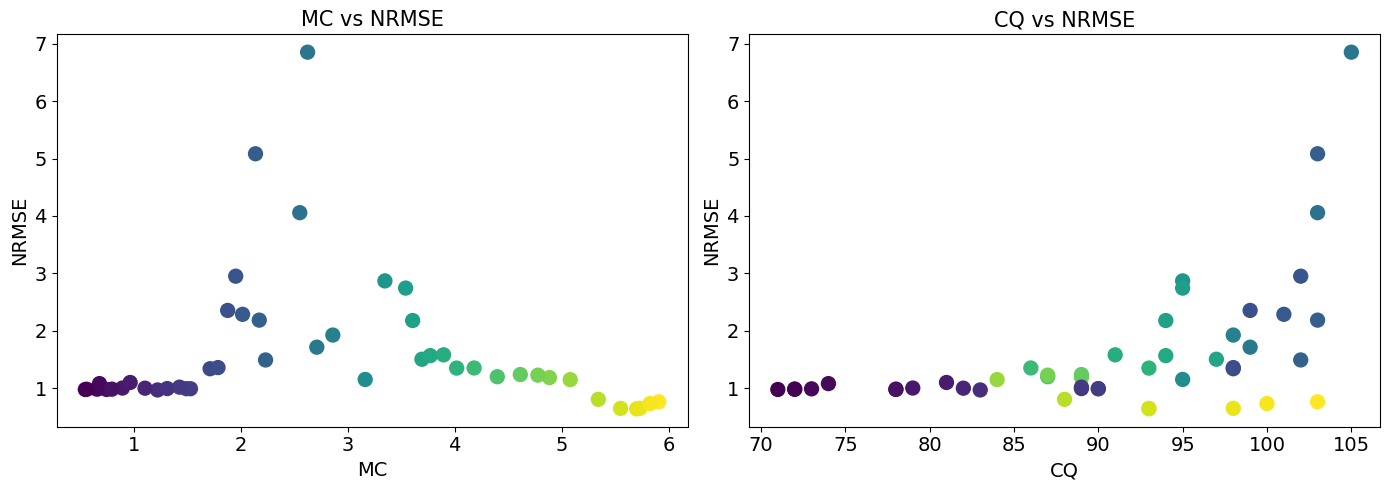

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MC vs Error Rate （颜色随 MC 变化）
sc1 = axs[0].scatter(
    data99['MC'], data99['nrmse'],
    c=data99['MC'], cmap='viridis',s=100
)

axs[0].set_xlabel("MC", fontsize=14)
axs[0].set_ylabel("NRMSE", fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_title("MC vs NRMSE", fontsize=15)
# fig.colorbar(sc1, ax=axs[0], label="MC")


# CQ vs Error Rate （颜色同样按 MC 变化）
sc2 = axs[1].scatter(
    data99['CQ'], data99['nrmse'],
    c=data99['MC'], cmap='viridis',s=100
)
axs[1].set_xlabel("CQ", fontsize=14)
axs[1].set_ylabel("NRMSE", fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_title("CQ vs NRMSE", fontsize=15)
# fig.colorbar(sc2, ax=axs[1], label="MC")

plt.tight_layout()
plt.show()

In [12]:
filename_path101 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_normalized_-11.csv"
#CQ_max数据
data101 = collect_data(filename_path101)

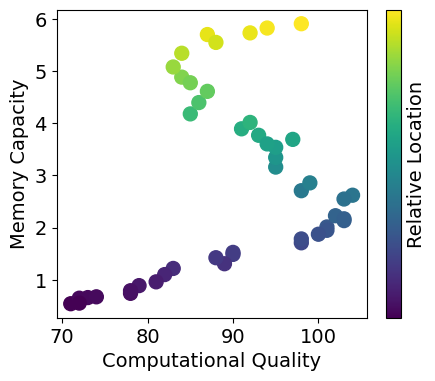

In [9]:
plt.figure(figsize=(5, 4))
plt.scatter(data101["kr_threshold"]-data101["gr_threshold"], data101["MC"], c=data101["MC"], cmap='viridis', s=100)
cbar = plt.colorbar(label='Relative Location', ticks=[])
cbar.set_label('Relative Location', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

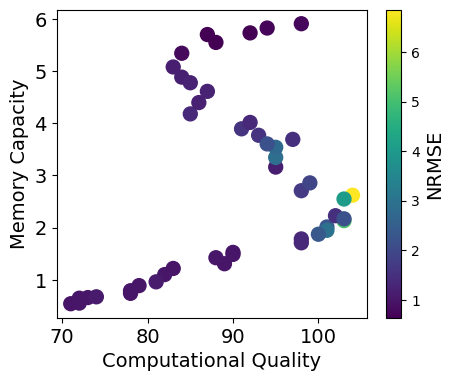

In [10]:
plt.figure(figsize=(5, 4))
plt.scatter(data101["kr_threshold"]-data101["gr_threshold"], data101["MC"], c=data101["nrmse"], cmap='viridis', s=100)
cbar = plt.colorbar(label='NRMSE')
cbar.set_label('NRMSE', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

C:\Users\Chen\AppData\Local\Temp\ipykernel_117132\476198375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrmse1[nrmse1>1]=1.1


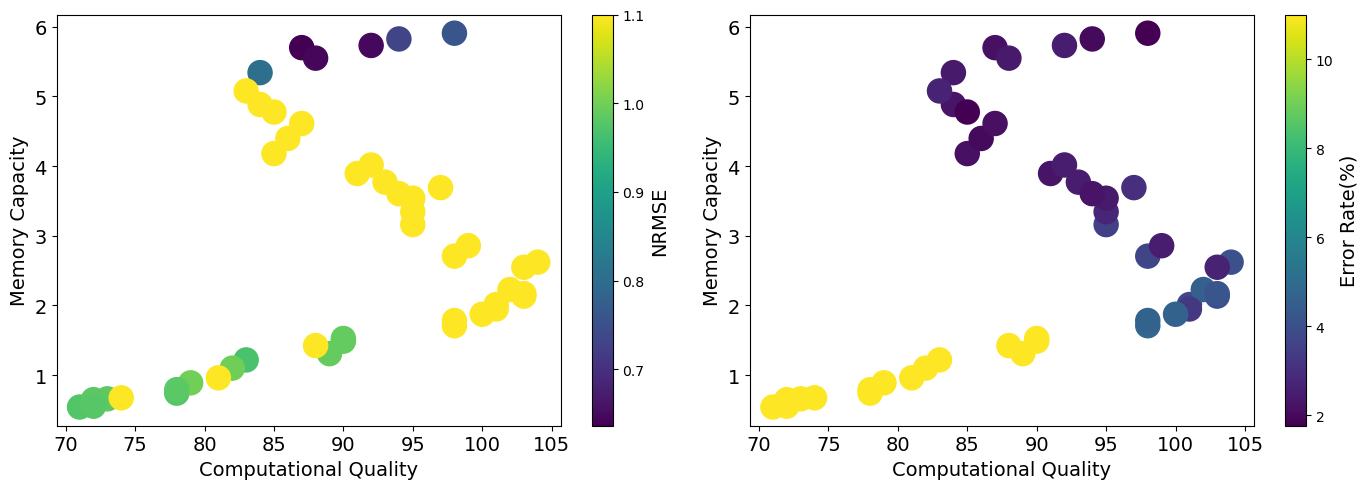

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
nrmse1 = data101["nrmse"]
nrmse1[nrmse1>1]=1.1
error_rate1 = (1-data101["acc"])*100
error_rate1[error_rate > 10] = 11

# 子图1: NRMSE
sc1 = axs[0].scatter(data101["kr_threshold"]-data101["gr_threshold"], data101["MC"], c=nrmse1, cmap='viridis', s=300)
cbar1 = plt.colorbar(sc1, ax=axs[0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0].set_xlabel('Computational Quality', fontsize=14)
axs[0].set_ylabel('Memory Capacity', fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
# # 标注trials
# for x, y, trial in zip(CQ_without, MC, trials):
#     axs[0].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
# axs[0].set_title('NRMSE', fontsize=15)

# 子图2: Error Rate
sc2 = axs[1].scatter(data101["kr_threshold"]-data101["gr_threshold"], data101["MC"], c=error_rate1, cmap='viridis', s=300)
cbar2 = plt.colorbar(sc2, ax=axs[1])
cbar2.set_label('Error Rate(%)', fontsize=14)
axs[1].set_xlabel('Computational Quality', fontsize=14)
axs[1].set_ylabel('Memory Capacity', fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
# # 标注trials
# for x, y, trial in zip(CQ_without, MC, trials):
#     axs[1].text(x, y, str(trial), fontsize=6, ha='center', va='center', color='white', fontweight='bold')
# axs[1].set_title('Error Rate(%)', fontsize=15)

plt.tight_layout()
plt.show()

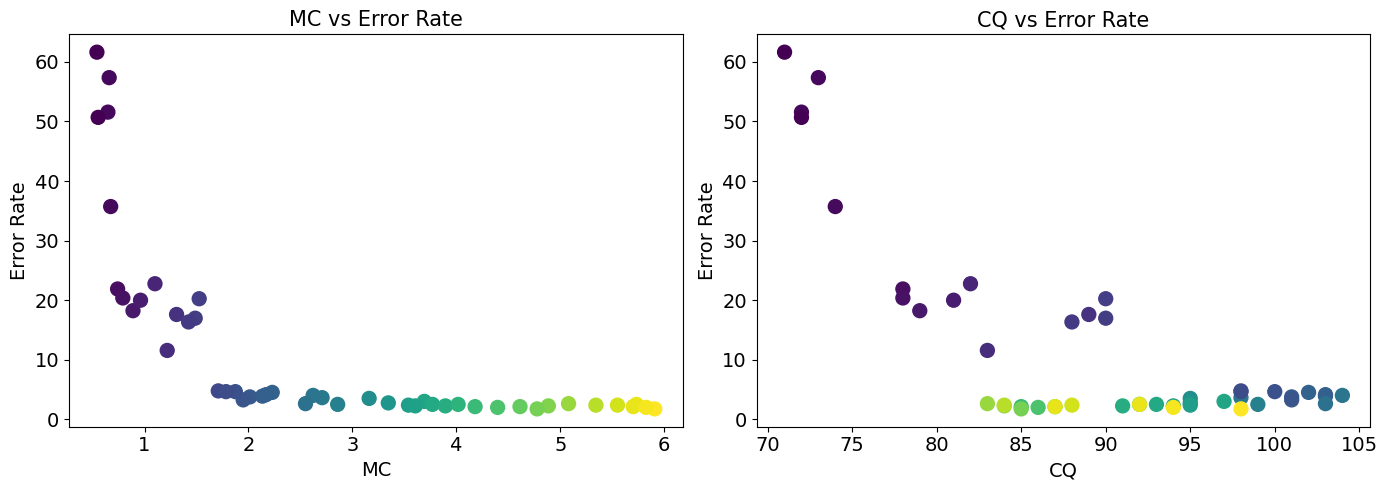

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MC vs Error Rate （颜色随 MC 变化）
sc1 = axs[0].scatter(
    data101['MC'], (1-data101["acc"])*100,
    c=data101['MC'], cmap='viridis',s=100
)

axs[0].set_xlabel("MC", fontsize=14)
axs[0].set_ylabel("Error Rate", fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_title("MC vs Error Rate", fontsize=15)
# fig.colorbar(sc1, ax=axs[0], label="MC")


# CQ vs Error Rate （颜色同样按 MC 变化）
sc2 = axs[1].scatter(
    data101['CQ'], (1-data101["acc"])*100,
    c=data101['MC'], cmap='viridis',s=100
)
axs[1].set_xlabel("CQ", fontsize=14)
axs[1].set_ylabel("Error Rate", fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_title("CQ vs Error Rate", fontsize=15)
# fig.colorbar(sc2, ax=axs[1], label="MC")

plt.tight_layout()
plt.show()

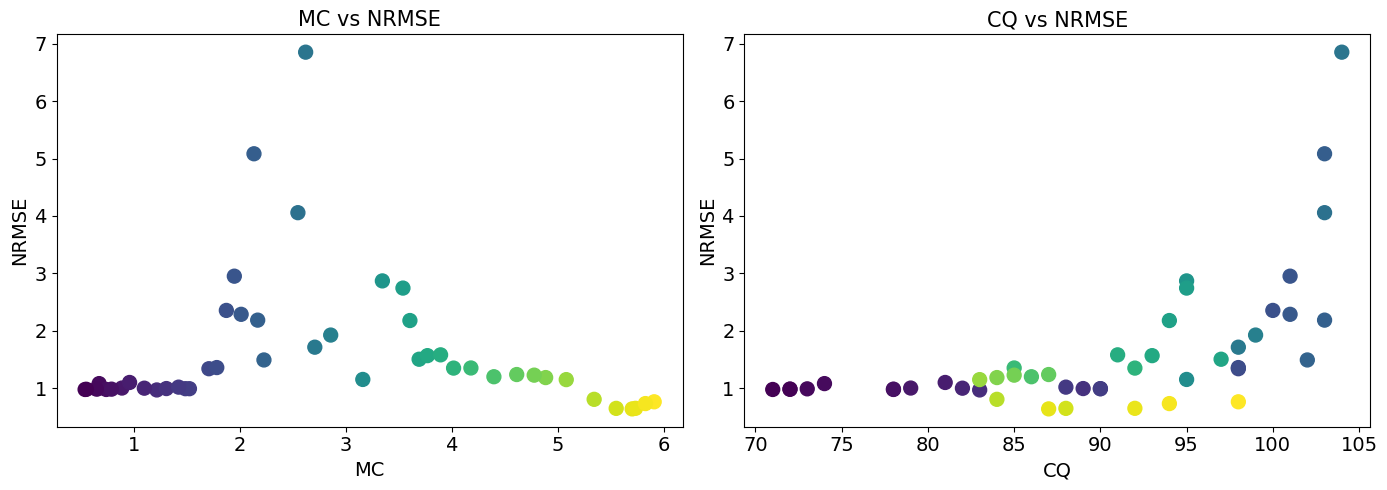

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MC vs Error Rate （颜色随 MC 变化）
sc1 = axs[0].scatter(
    data101['MC'], data101['nrmse'],
    c=data101['MC'], cmap='viridis',s=100
)

axs[0].set_xlabel("MC", fontsize=14)
axs[0].set_ylabel("NRMSE", fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_title("MC vs NRMSE", fontsize=15)
# fig.colorbar(sc1, ax=axs[0], label="MC")


# CQ vs Error Rate （颜色同样按 MC 变化）
sc2 = axs[1].scatter(
    data101['CQ'], data101['nrmse'],
    c=data101['MC'], cmap='viridis',s=100
)
axs[1].set_xlabel("CQ", fontsize=14)
axs[1].set_ylabel("NRMSE", fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_title("CQ vs NRMSE", fontsize=15)
# fig.colorbar(sc2, ax=axs[1], label="MC")

plt.tight_layout()
plt.show()

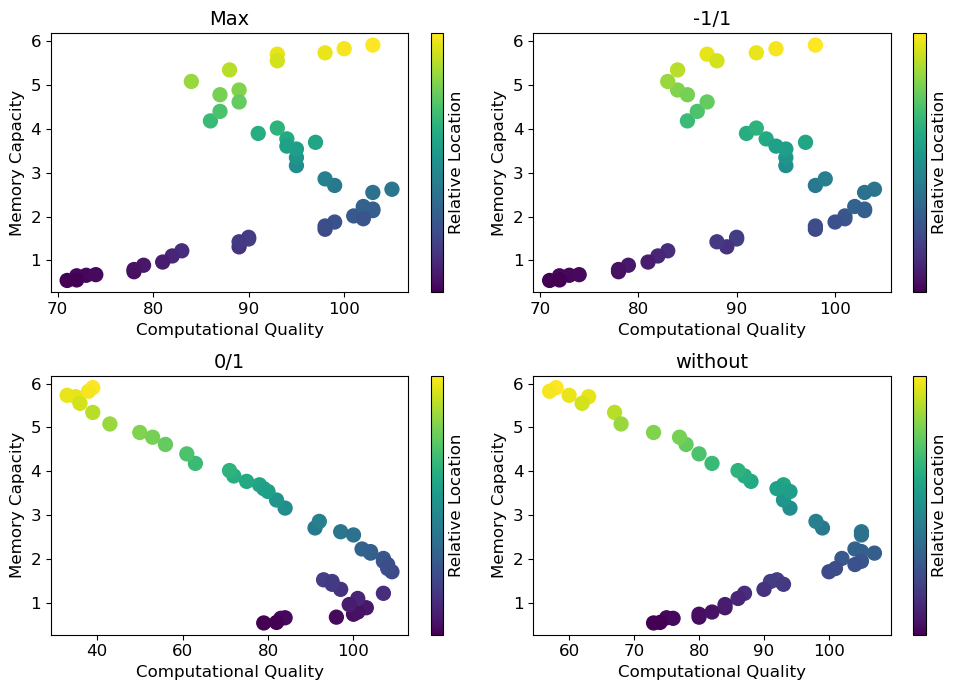

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# 子图1：kr_threshold-gr_threshold vs MC
sc1 = axs[0, 0].scatter(
    data99["kr_threshold"] - data99["gr_threshold"], data99["MC"],
    c=data99["MC"], cmap='viridis', s=100
)
cbar1 = fig.colorbar(sc1, ax=axs[0, 0],ticks=[])
cbar1.set_label('Relative Location', fontsize=12)
axs[0, 0].set_xlabel('Computational Quality', fontsize=12)
axs[0, 0].set_ylabel('Memory Capacity', fontsize=12)
axs[0, 0].set_title('Max', fontsize=14)
axs[0, 0].tick_params(axis='both', labelsize=12)

# 子图2：kr_threshold-gr_threshold vs CQ
sc2 = axs[0, 1].scatter(
    data101["kr_threshold"] - data101["gr_threshold"], data101["MC"],
    c=data101["MC"], cmap='viridis', s=100
)
cbar2 = fig.colorbar(sc2, ax=axs[0, 1],ticks=[])
cbar2.set_label('Relative Location', fontsize=12)
axs[0, 1].set_xlabel('Computational Quality', fontsize=12)
axs[0, 1].set_ylabel('Memory Capacity', fontsize=12)
axs[0, 1].set_title('-1/1', fontsize=14)
axs[0, 1].tick_params(axis='both', labelsize=12)

# 子图3：kr_threshold-gr_threshold vs acc
sc3 = axs[1, 0].scatter(
    CQ_01, data101["MC"],
    c=data101["MC"], cmap='viridis', s=100
)
cbar3 = fig.colorbar(sc3, ax=axs[1, 0],ticks=[])
cbar3.set_label('Relative Location', fontsize=12)
axs[1, 0].set_xlabel('Computational Quality', fontsize=12)
axs[1, 0].set_ylabel('Memory Capacity', fontsize=12)
axs[1, 0].set_title('0/1', fontsize=14)
axs[1, 0].tick_params(axis='both', labelsize=12)

# 子图4：kr_threshold-gr_threshold vs nrmse
sc4 = axs[1, 1].scatter(
    CQ_without, data101["MC"],
    c=data101["MC"], cmap='viridis', s=100
)
cbar4 = fig.colorbar(sc4, ax=axs[1, 1],ticks=[])
cbar4.set_label('Relative Location', fontsize=12)
axs[1, 1].set_xlabel('Computational Quality', fontsize=12)
axs[1, 1].set_ylabel('Memory Capacity', fontsize=12)
axs[1, 1].set_title('without', fontsize=14)
axs[1, 1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

调查下m0 0.03-0.18 gamma 0.045-0.1, without范围内的grid search

In [18]:
import pickle
# 提取数据.pkl
with open('../Res_Tasks_Results/Reservoir_Res_m00.03-0.18_gamma0.045-0.1_without/results.pkl', 'rb') as f:
    result = pickle.load(f)

runs = result['runs']
MC_data = runs[0]['results']['MC']
print(MC_data)

[np.float64(5.973888639065236), np.float64(5.885196352421547), np.float64(5.632699544491285), np.float64(4.936710511181612), np.float64(4.233838139835503), np.float64(2.464664847389591), np.float64(1.7528692135266803), np.float64(1.5069994536482318), np.float64(1.2172742823874074), np.float64(1.1005567619356307), np.float64(5.6448453138387515), np.float64(5.606085851788318), np.float64(5.298737237879987), np.float64(4.695564809383982), np.float64(3.6109588340946663), np.float64(2.54091434959969), np.float64(2.064958388825584), np.float64(1.6662491429531192), np.float64(1.1436313697580693), np.float64(1.041099349236777), np.float64(5.324636671085711), np.float64(5.267796959309938), np.float64(5.0638614229718515), np.float64(4.61394484375692), np.float64(3.8972342931080037), np.float64(3.0974031724916933), np.float64(2.1304509380618146), np.float64(1.6889710257152517), np.float64(1.3922425808212306), np.float64(1.1072515002167567), np.float64(4.926209000284635), np.float64(4.838778107478

In [28]:
# 使用插值法平滑数据
from scipy.interpolate import griddata
import numpy as np
import pandas as pd

def interpolation(x, y, z, nx=200, ny=200):
    x = np.asarray(x).ravel()   
    y = np.asarray(y).ravel()
    z = np.asarray(z).ravel()

    # confirm the length of x and y are the same
    if x.shape[0] != y.shape[0] or x.shape[0] != z.shape[0]:
        raise ValueError("x and y must have the same length")
    
    # generate the grid
    xi = np.linspace(x.min(), x.max(), nx)
    print(x.min(), x.max())
    yi = np.linspace(y.min(), y.max(), ny)
    Xi, Yi = np.meshgrid(xi, yi)

    # interpolate the data
    zi = griddata((x, y), z, (Xi, Yi), method='cubic')

    return Xi, Yi, zi

def plot_heatmap(x, y, zi, xlabel = 'm0', ylabel = 'gamma',value_label='MC'):

    plt.figure(figsize=(7, 5))
    ax = plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], 
                   cmap='viridis', aspect='auto', origin='lower')
    print(x.min(), x.max(), y.min(), y.max())

    # 添加颜色条并设置标签
    cbar = plt.colorbar(ax)
    cbar.set_label(value_label, fontsize=14)
    cbar.ax.tick_params(labelsize=14)

    # 设置轴标签
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # 格式化x和y轴刻度为三位小数
    x_ticks = plt.xticks()[0]
    y_ticks = plt.yticks()[0]
    plt.xticks(x_ticks, [f'{tick:.2f}' for tick in x_ticks], fontsize=14)
    plt.yticks(y_ticks, [f'{tick:.2f}' for tick in y_ticks], fontsize=14)

    # 颠倒gamma轴方向
    # plt.gca().invert_yaxis()

    plt.show()


0.03 0.18
0.03 0.18 0.045 0.1


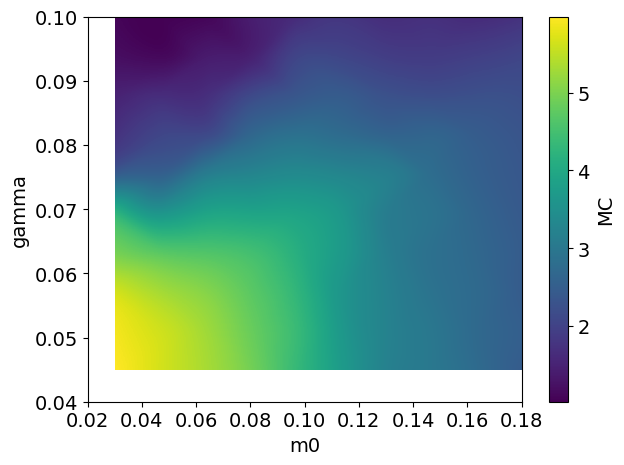

In [29]:
results = runs[0]['results']

x = np.array(results['m0'])     # 长度=100
y = np.array(results['gamma'])  # 长度=100
z = np.array(results['MC'])     # 长度=100

# 进行插值
Xi, Yi, zi = interpolation(x, y, z, nx=200, ny=200)

# 调用函数
plot_heatmap(Xi, Yi, zi, value_label='MC')

0.03 0.18
0.03 0.18 0.045 0.1


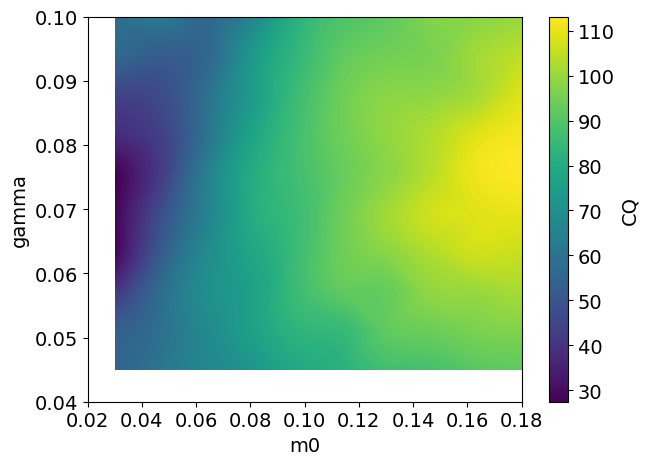

In [30]:
results = runs[1]['results']

x = np.array(results['m0'])     # 长度=100
y = np.array(results['gamma'])  # 长度=100
z = np.array(results['CQ'])     # 长度=100

# 进行插值
Xi, Yi, zi = interpolation(x, y, z, nx=150, ny=150)

# 调用函数
plot_heatmap(Xi, Yi, zi, value_label='CQ')

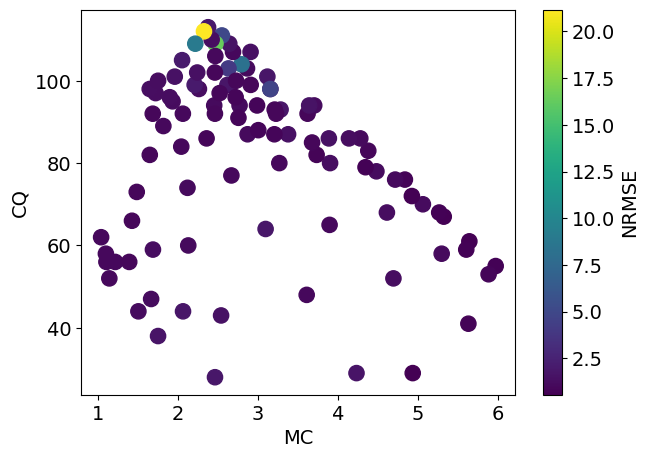

In [31]:
x = np.array(runs[0]['results']['MC'])
y = np.array(runs[1]['results']['CQ'])
z = np.array(runs[2]['results']['NRMSE'])

# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(x, y, c=z, cmap='viridis', s=120)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('MC', fontsize =14)
plt.ylabel('CQ',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

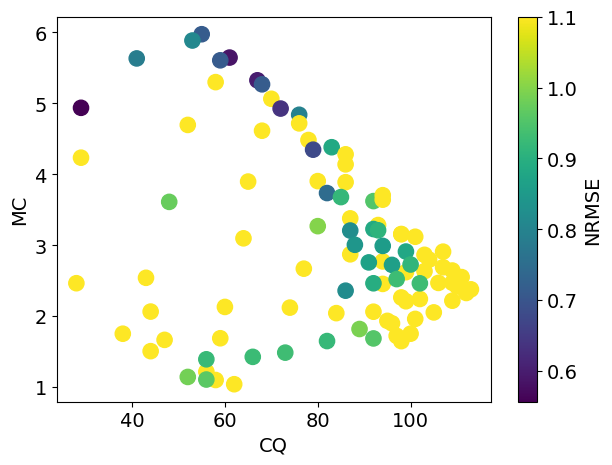

In [33]:
x = np.array(runs[0]['results']['MC'])
y = np.array(runs[1]['results']['CQ'])
z = np.array(runs[2]['results']['NRMSE'])
z[z>1]=1.1

# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(y, x, c=z, cmap='viridis', s=120)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('NRMSE', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('CQ', fontsize =14)
plt.ylabel('MC',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

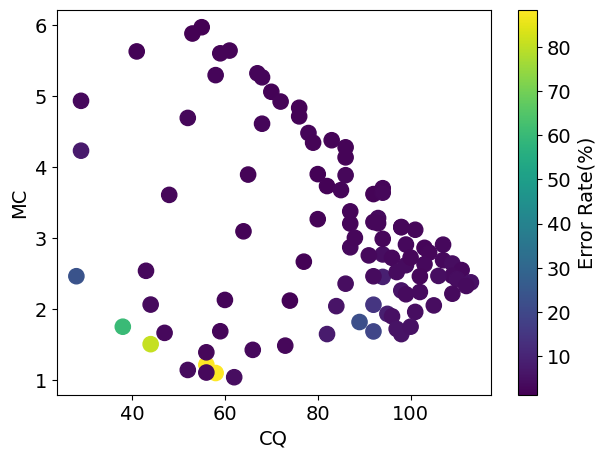

In [34]:
x = np.array(runs[0]['results']['MC'])
y = np.array(runs[1]['results']['CQ'])
z = np.array(runs[3]['results']['acc'])
z = (1-z)*100

# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(y, x, c=z, cmap='viridis', s=120)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('Error Rate(%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('CQ', fontsize =14)
plt.ylabel('MC',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

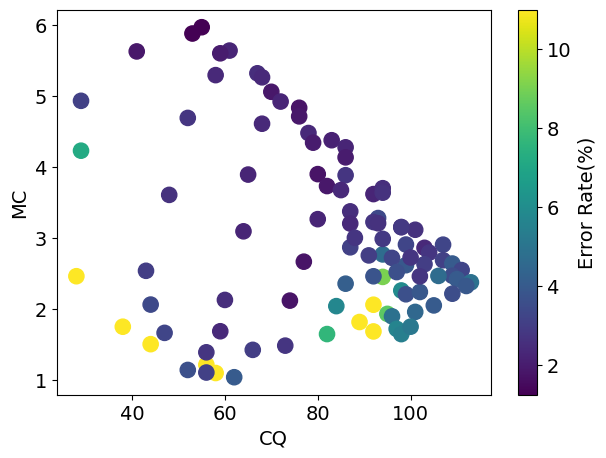

In [35]:
x = np.array(runs[0]['results']['MC'])
y = np.array(runs[1]['results']['CQ'])
z = np.array(runs[3]['results']['acc'])
z = (1-z)*100
z[z>10]=11

# 绘制热力图
plt.figure(figsize = (7,5))
plt.scatter(y, x, c=z, cmap='viridis', s=120)  # s控制circle大小
cbar = plt.colorbar()
cbar.set_label('Error Rate(%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
plt.xlabel('CQ', fontsize =14)
plt.ylabel('MC',fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

#### 调查下‘支配点’的TIMs对任务表现的可解释性